# Prediksi Resesi Ekonomi dengan Metode Forecasting dan Klasifikasi

# PREPROCESSING DAN EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

# Box-Cox
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

# Library ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('recession_dataset_1984_2024.csv')
df

,DATE,UNRATE,AHETPI,PERMIT,CSCICP03USM665S,AAA10Y,M2REAL,CPIAUCSL,FEDFUNDS,PAYEMS,...,WPSFD49207,GS1,DSPIC96,INDPRO,CPIAUCSL.1,IC4WSA,IPMAN,WM2NS,Baa,0
0,1984-01-01,8.0,8.38,1816.0,101.3788,NaN,2094.2,102.100,9.56,92673.0,...,103.000,9.90,5851.3,53.0088,102.100,NaN,48.5811,NaN,13.65,0.0
1,1984-02-01,7.8,8.38,1987.0,101.5106,0.35,2103.5,102.600,9.59,93157.0,...,103.400,10.04,5884.8,53.2486,102.600,NaN,49.1102,NaN,13.59,0.0
2,1984-03-01,7.8,8.41,1725.0,101.5403,0.27,2113.9,102.900,9.91,93429.0,...,103.800,10.59,5922.6,53.5028,102.900,NaN,49.3252,NaN,13.99,0.0
3,1984-04-01,7.7,8.45,1776.0,101.4181,NaN,2121.7,103.300,10.29,93792.0,...,103.900,10.90,5962.5,53.8233,103.300,NaN,49.5755,NaN,14.31,0.0
4,1984-05-01,7.4,8.45,1741.0,101.3399,0.18,2129.6,103.500,10.32,94098.0,...,103.800,11.66,5971.0,54.1104,103.500,NaN,49.7244,NaN,14.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2024-08-01,4.2,30.27,1470.0,NaN,0.99,6744.2,314.131,5.33,158074.0,...,257.656,4.43,17494.6,103.0196,314.131,NaN,99.9270,NaN,5.60,0.0
488,2024-09-01,4.1,30.38,1425.0,NaN,NaN,6756.3,314.851,5.13,158314.0,...,257.525,4.03,17519.6,102.5954,314.851,NaN,99.6108,NaN,5.42,0.0
489,2024-10-01,4.1,30.49,1419.0,NaN,0.94,6761.1,315.564,4.83,158358.0,...,257.362,4.20,17568.5,102.2138,315.564,NaN,98.9959,NaN,5.63,0.0
490,2024-11-01,4.2,30.58,1493.0,NaN,0.80,6779.8,316.449,4.64,158619.0,...,259.459,4.33,17592.4,101.9619,316.449,NaN,99.2006,NaN,5.78,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             492 non-null    object 
 1   UNRATE           492 non-null    float64
 2   AHETPI           492 non-null    float64
 3   PERMIT           492 non-null    float64
 4   CSCICP03USM665S  481 non-null    float64
 5   AAA10Y           315 non-null    float64
 6   M2REAL           492 non-null    float64
 7   CPIAUCSL         492 non-null    float64
 8   FEDFUNDS         492 non-null    float64
 9   PAYEMS           492 non-null    float64
 10  PCE              492 non-null    float64
 11  GS10             492 non-null    float64
 12  T10Y2Y           315 non-null    float64
 13  DGS10            315 non-null    float64
 14  CPILFESL         492 non-null    float64
 15  HOUST            492 non-null    float64
 16  WPSFD49207       492 non-null    float64
 17  GS1             

### Drop Kolom
karena ada kolom yang sama persis (isinya)  

---



In [ ]:
df = df.drop(columns=['CPIAUCSL.1'])

### Ubah Nama Kolom
untuk memudahkan


---



In [ ]:
pemetaan_kolom = {
    "UNRATE": "Tingkat_Pengangguran",
    "AHETPI": "Upah_Per_Jam",
    "PERMIT": "Izin_Pembangunan_Rumah_Baru",
    "CSCICP03USM665S": "Indeks_Kepercayaan_Konsumen",
    "AAA10Y": "Selisih_Obligasi_Korporat_dan_10Y_Treasury",
    "M2REAL": "Stok_Uang_M2_Real",
    "CPIAUCSL": "Indeks_Harga_Konsumen",
    "FEDFUNDS": "Suku_Bunga_Federal",
    "PAYEMS": "Jumlah_Pekerja_Selain_Pertanian",
    "PCE": "Pengeluaran_Konsumsi_Personal",
    "GS10": "Imbal_Hasil_Obligasi_10_Tahun",
    "T10Y2Y": "Selisih_10Y_dan_2Y_Treasury",
    "DGS10": "Imbal_Hasil_10Y_Treasury",
    "CPILFESL": "Indeks_Harga_Konsumen_Inti",
    "HOUST": "Pembangunan_Rumah_Baru_Dimulai",
    "WPSFD49207": "Indeks_Harga_Produsen_Barang_Jadi",
    "GS1": "Imbal_Hasil_1Y_Treasury",
    "DSPIC96": "Pendapatan_Disposabel_Real",
    "INDPRO": "Indeks_Produksi_Industri",
    "IC4WSA": "Rata2_4Minggu_Klaim_Pengangguran_Awal",
    "IPMAN": "Produksi_Industri_Manufaktur",
    "WM2NS": "Stok_Uang_M2",
    "0": "Target"
}

df.rename(columns=pemetaan_kolom, inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DATE                                        492 non-null    object 
 1   Tingkat_Pengangguran                        492 non-null    float64
 2   Upah_Per_Jam                                492 non-null    float64
 3   Izin_Pembangunan_Rumah_Baru                 492 non-null    float64
 4   Indeks_Kepercayaan_Konsumen                 481 non-null    float64
 5   Selisih_Obligasi_Korporat_dan_10Y_Treasury  315 non-null    float64
 6   Stok_Uang_M2_Real                           492 non-null    float64
 7   Indeks_Harga_Konsumen                       492 non-null    float64
 8   Suku_Bunga_Federal                          492 non-null    float64
 9   Jumlah_Pekerja_Selain_Pertanian             492 non-null    float64
 10  Pengeluaran_Ko

### Cek dan Penanganan Missing Value

---



In [ ]:
df

,DATE,Tingkat_Pengangguran,Upah_Per_Jam,Izin_Pembangunan_Rumah_Baru,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Stok_Uang_M2_Real,Indeks_Harga_Konsumen,Suku_Bunga_Federal,Jumlah_Pekerja_Selain_Pertanian,...,Pembangunan_Rumah_Baru_Dimulai,Indeks_Harga_Produsen_Barang_Jadi,Imbal_Hasil_1Y_Treasury,Pendapatan_Disposabel_Real,Indeks_Produksi_Industri,Rata2_4Minggu_Klaim_Pengangguran_Awal,Produksi_Industri_Manufaktur,Stok_Uang_M2,Baa,Target
0,1984-01-01,8.0,8.38,1816.0,101.3788,NaN,2094.2,102.100,9.56,92673.0,...,1897.0,103.000,9.90,5851.3,53.0088,NaN,48.5811,NaN,13.65,0.0
1,1984-02-01,7.8,8.38,1987.0,101.5106,0.35,2103.5,102.600,9.59,93157.0,...,2260.0,103.400,10.04,5884.8,53.2486,NaN,49.1102,NaN,13.59,0.0
2,1984-03-01,7.8,8.41,1725.0,101.5403,0.27,2113.9,102.900,9.91,93429.0,...,1663.0,103.800,10.59,5922.6,53.5028,NaN,49.3252,NaN,13.99,0.0
3,1984-04-01,7.7,8.45,1776.0,101.4181,NaN,2121.7,103.300,10.29,93792.0,...,1851.0,103.900,10.90,5962.5,53.8233,NaN,49.5755,NaN,14.31,0.0
4,1984-05-01,7.4,8.45,1741.0,101.3399,0.18,2129.6,103.500,10.32,94098.0,...,1774.0,103.800,11.66,5971.0,54.1104,NaN,49.7244,NaN,14.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2024-08-01,4.2,30.27,1470.0,NaN,0.99,6744.2,314.131,5.33,158074.0,...,1379.0,257.656,4.43,17494.6,103.0196,NaN,99.9270,NaN,5.60,0.0
488,2024-09-01,4.1,30.38,1425.0,NaN,NaN,6756.3,314.851,5.13,158314.0,...,1355.0,257.525,4.03,17519.6,102.5954,NaN,99.6108,NaN,5.42,0.0
489,2024-10-01,4.1,30.49,1419.0,NaN,0.94,6761.1,315.564,4.83,158358.0,...,1344.0,257.362,4.20,17568.5,102.2138,NaN,98.9959,NaN,5.63,0.0
490,2024-11-01,4.2,30.58,1493.0,NaN,0.80,6779.8,316.449,4.64,158619.0,...,1305.0,259.459,4.33,17592.4,101.9619,NaN,99.2006,NaN,5.78,0.0


In [ ]:
missing_percentage = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percentage)

Rata2_4Minggu_Klaim_Pengangguran_Awal         85.975610
Stok_Uang_M2                                  85.772358
Selisih_10Y_dan_2Y_Treasury                   35.975610
Imbal_Hasil_10Y_Treasury                      35.975610
Selisih_Obligasi_Korporat_dan_10Y_Treasury    35.975610
Indeks_Kepercayaan_Konsumen                    2.235772
DATE                                           0.000000
Upah_Per_Jam                                   0.000000
Tingkat_Pengangguran                           0.000000
Suku_Bunga_Federal                             0.000000
Indeks_Harga_Konsumen                          0.000000
Stok_Uang_M2_Real                              0.000000
Izin_Pembangunan_Rumah_Baru                    0.000000
Imbal_Hasil_Obligasi_10_Tahun                  0.000000
Indeks_Harga_Konsumen_Inti                     0.000000
Pengeluaran_Konsumsi_Personal                  0.000000
Jumlah_Pekerja_Selain_Pertanian                0.000000
Indeks_Harga_Produsen_Barang_Jadi              0

In [ ]:
# Drop kolom untuk missing values >50%
df = df.loc[:, df.isnull().mean() < 0.5]

# Interpolasi linear untuk kolom dengan missing values 20-50% untuk menjaga kontinuitas tren karena kolom ini merupakan time-series dan numerik
df['Imbal_Hasil_10Y_Treasury'] = df['Imbal_Hasil_10Y_Treasury'].interpolate(method='linear', limit_direction='both')
df['Selisih_Obligasi_Korporat_dan_10Y_Treasury'] = df['Selisih_Obligasi_Korporat_dan_10Y_Treasury'].interpolate(method='linear', limit_direction='both')
df['Selisih_10Y_dan_2Y_Treasury'] = df['Selisih_10Y_dan_2Y_Treasury'].interpolate(method='linear', limit_direction='both')

# Isi dengan median untuk kolom dengan missing kecil agar lebih tahan terhadap outlier
df['Indeks_Kepercayaan_Konsumen'] = df['Indeks_Kepercayaan_Konsumen'].fillna(df['Indeks_Kepercayaan_Konsumen'].median())

<ipython-input-9-3109849964>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Imbal_Hasil_10Y_Treasury'] = df['Imbal_Hasil_10Y_Treasury'].interpolate(method='linear', limit_direction='both')
<ipython-input-9-3109849964>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Selisih_Obligasi_Korporat_dan_10Y_Treasury'] = df['Selisih_Obligasi_Korporat_dan_10Y_Treasury'].interpolate(method='linear', limit_direction='both')
<ipython-input-9-3109849964>:7: SettingWithCopyWarning: 
A value is trying to be set o

In [ ]:
print(df.isnull().sum())

DATE                                          0
Tingkat_Pengangguran                          0
Upah_Per_Jam                                  0
Izin_Pembangunan_Rumah_Baru                   0
Indeks_Kepercayaan_Konsumen                   0
Selisih_Obligasi_Korporat_dan_10Y_Treasury    0
Stok_Uang_M2_Real                             0
Indeks_Harga_Konsumen                         0
Suku_Bunga_Federal                            0
Jumlah_Pekerja_Selain_Pertanian               0
Pengeluaran_Konsumsi_Personal                 0
Imbal_Hasil_Obligasi_10_Tahun                 0
Selisih_10Y_dan_2Y_Treasury                   0
Imbal_Hasil_10Y_Treasury                      0
Indeks_Harga_Konsumen_Inti                    0
Pembangunan_Rumah_Baru_Dimulai                0
Indeks_Harga_Produsen_Barang_Jadi             0
Imbal_Hasil_1Y_Treasury                       0
Pendapatan_Disposabel_Real                    0
Indeks_Produksi_Industri                      0
Produksi_Industri_Manufaktur            

In [ ]:
df

,DATE,Tingkat_Pengangguran,Upah_Per_Jam,Izin_Pembangunan_Rumah_Baru,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Stok_Uang_M2_Real,Indeks_Harga_Konsumen,Suku_Bunga_Federal,Jumlah_Pekerja_Selain_Pertanian,...,Imbal_Hasil_10Y_Treasury,Indeks_Harga_Konsumen_Inti,Pembangunan_Rumah_Baru_Dimulai,Indeks_Harga_Produsen_Barang_Jadi,Imbal_Hasil_1Y_Treasury,Pendapatan_Disposabel_Real,Indeks_Produksi_Industri,Produksi_Industri_Manufaktur,Baa,Target
0,1984-01-01,8.0,8.38,1816.0,101.3788,0.350,2094.2,102.100,9.56,92673.0,...,11.640,102.500,1897.0,103.000,9.90,5851.3,53.0088,48.5811,13.65,0.0
1,1984-02-01,7.8,8.38,1987.0,101.5106,0.350,2103.5,102.600,9.59,93157.0,...,11.640,102.800,2260.0,103.400,10.04,5884.8,53.2486,49.1102,13.59,0.0
2,1984-03-01,7.8,8.41,1725.0,101.5403,0.270,2113.9,102.900,9.91,93429.0,...,12.070,103.200,1663.0,103.800,10.59,5922.6,53.5028,49.3252,13.99,0.0
3,1984-04-01,7.7,8.45,1776.0,101.4181,0.225,2121.7,103.300,10.29,93792.0,...,12.445,103.700,1851.0,103.900,10.90,5962.5,53.8233,49.5755,14.31,0.0
4,1984-05-01,7.4,8.45,1741.0,101.3399,0.180,2129.6,103.500,10.32,94098.0,...,12.820,104.100,1774.0,103.800,11.66,5971.0,54.1104,49.7244,14.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2024-08-01,4.2,30.27,1470.0,100.5603,0.990,6744.2,314.131,5.33,158074.0,...,3.990,319.839,1379.0,257.656,4.43,17494.6,103.0196,99.9270,5.60,0.0
488,2024-09-01,4.1,30.38,1425.0,100.5603,0.965,6756.3,314.851,5.13,158314.0,...,3.865,320.835,1355.0,257.525,4.03,17519.6,102.5954,99.6108,5.42,0.0
489,2024-10-01,4.1,30.49,1419.0,100.5603,0.940,6761.1,315.564,4.83,158358.0,...,3.740,321.688,1344.0,257.362,4.20,17568.5,102.2138,98.9959,5.63,0.0
490,2024-11-01,4.2,30.58,1493.0,100.5603,0.800,6779.8,316.449,4.64,158619.0,...,4.370,322.619,1305.0,259.459,4.33,17592.4,101.9619,99.2006,5.78,0.0


### Ubah Tipe Data Kolom DATE

---



In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

<ipython-input-12-3876622728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])


,Tingkat_Pengangguran,Upah_Per_Jam,Izin_Pembangunan_Rumah_Baru,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Stok_Uang_M2_Real,Indeks_Harga_Konsumen,Suku_Bunga_Federal,Jumlah_Pekerja_Selain_Pertanian,Pengeluaran_Konsumsi_Personal,...,Imbal_Hasil_10Y_Treasury,Indeks_Harga_Konsumen_Inti,Pembangunan_Rumah_Baru_Dimulai,Indeks_Harga_Produsen_Barang_Jadi,Imbal_Hasil_1Y_Treasury,Pendapatan_Disposabel_Real,Indeks_Produksi_Industri,Produksi_Industri_Manufaktur,Baa,Target
DATE,,,,,,,,,,,,,,,,,,,,,
1984-01-01,8.0,8.38,1816.0,101.3788,0.350,2094.2,102.100,9.56,92673.0,2419.4,...,11.640,102.500,1897.0,103.000,9.90,5851.3,53.0088,48.5811,13.65,0.0
1984-02-01,7.8,8.38,1987.0,101.5106,0.350,2103.5,102.600,9.59,93157.0,2403.5,...,11.640,102.800,2260.0,103.400,10.04,5884.8,53.2486,49.1102,13.59,0.0
1984-03-01,7.8,8.41,1725.0,101.5403,0.270,2113.9,102.900,9.91,93429.0,2431.6,...,12.070,103.200,1663.0,103.800,10.59,5922.6,53.5028,49.3252,13.99,0.0
1984-04-01,7.7,8.45,1776.0,101.4181,0.225,2121.7,103.300,10.29,93792.0,2457.5,...,12.445,103.700,1851.0,103.900,10.90,5962.5,53.8233,49.5755,14.31,0.0
1984-05-01,7.4,8.45,1741.0,101.3399,0.180,2129.6,103.500,10.32,94098.0,2474.5,...,12.820,104.100,1774.0,103.800,11.66,5971.0,54.1104,49.7244,14.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,4.2,30.27,1470.0,100.5603,0.990,6744.2,314.131,5.33,158074.0,19905.0,...,3.990,319.839,1379.0,257.656,4.43,17494.6,103.0196,99.9270,5.60,0.0
2024-09-01,4.1,30.38,1425.0,100.5603,0.965,6756.3,314.851,5.13,158314.0,20044.1,...,3.865,320.835,1355.0,257.525,4.03,17519.6,102.5954,99.6108,5.42,0.0
2024-10-01,4.1,30.49,1419.0,100.5603,0.940,6761.1,315.564,4.83,158358.0,20123.2,...,3.740,321.688,1344.0,257.362,4.20,17568.5,102.2138,98.9959,5.63,0.0


### Cek Duplikat Data

---



In [ ]:
duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplikat}")

Jumlah data duplikat: 0


### EDA Awal

---



In [ ]:
print(df.describe())

       Tingkat_Pengangguran  Upah_Per_Jam  Izin_Pembangunan_Rumah_Baru  \
count            492.000000    492.000000                   492.000000   
mean               5.820528     16.573821                  1388.310976   
std                1.669556      5.927569                   383.819945   
min                3.400000      8.380000                   513.000000   
25%                4.600000     11.265000                  1139.000000   
50%                5.500000     15.680000                  1421.500000   
75%                6.900000     20.670000                  1660.500000   
max               14.800000     30.670000                  2263.000000   

       Indeks_Kepercayaan_Konsumen  \
count                   492.000000   
mean                    100.121448   
std                       1.446673   
min                      96.201320   
25%                      99.157983   
50%                     100.560300   
75%                     101.062175   
max                     102.8

Analisis Distribusi dan Outlier


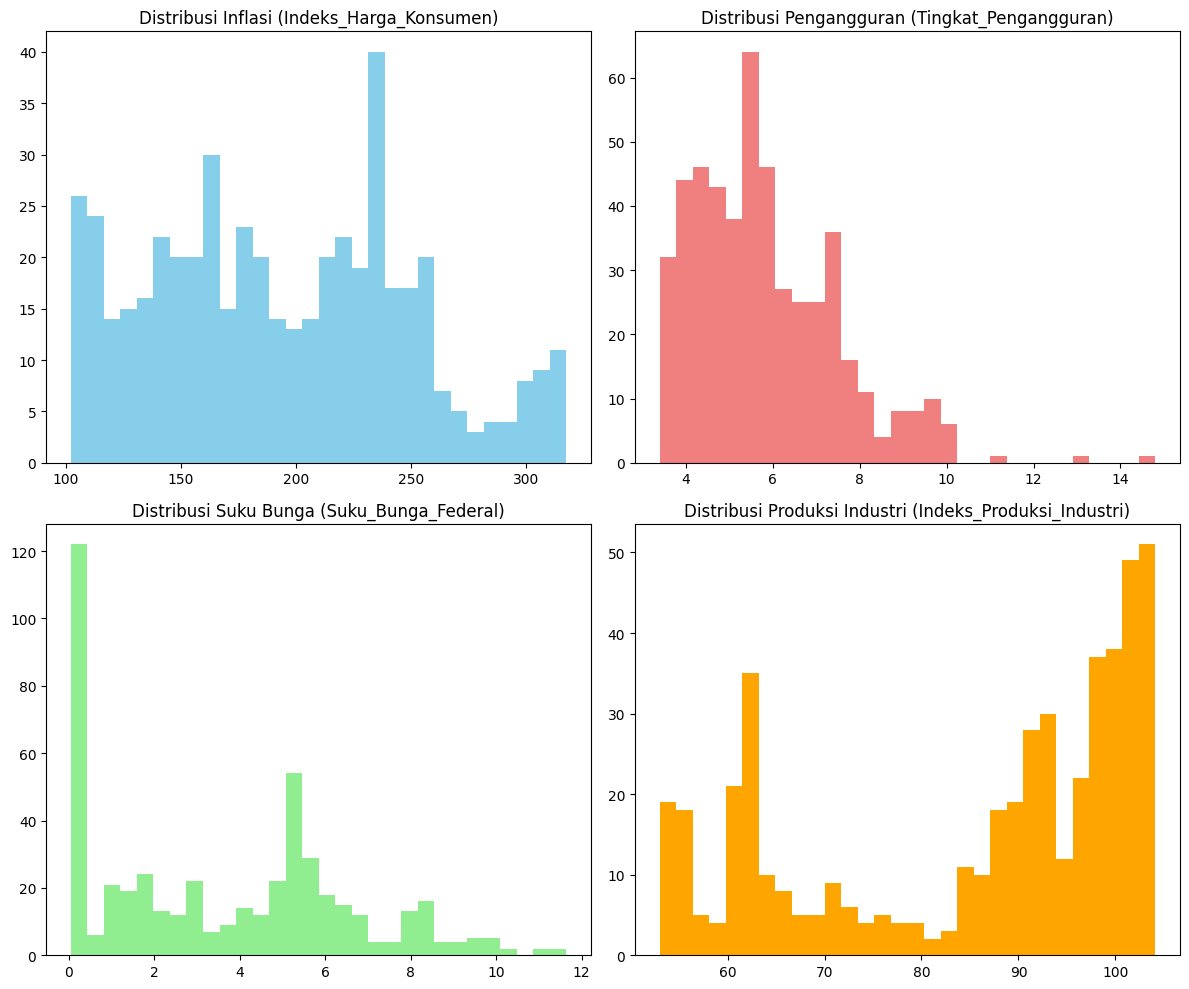

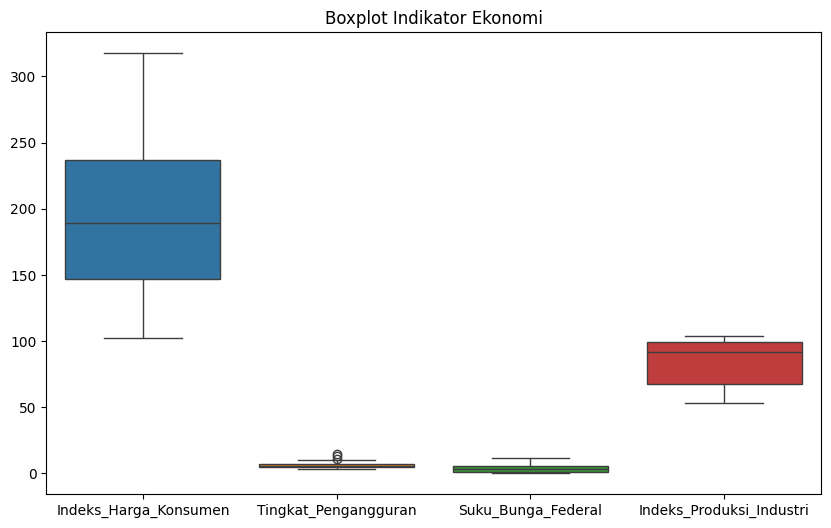

In [ ]:
print("Analisis Distribusi dan Outlier")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes[0, 0].hist(df['Indeks_Harga_Konsumen'].astype(float).dropna().values.ravel(), bins=30, color='skyblue')
axes[0, 0].set_title('Distribusi Inflasi (Indeks_Harga_Konsumen)')


axes[0, 1].hist(df['Tingkat_Pengangguran'].astype(float).dropna().values.ravel(), bins=30, color='lightcoral')
axes[0, 1].set_title('Distribusi Pengangguran (Tingkat_Pengangguran)')


axes[1, 0].hist(df['Suku_Bunga_Federal'].astype(float).dropna().values.ravel(), bins=30, color='lightgreen')
axes[1, 0].set_title('Distribusi Suku Bunga (Suku_Bunga_Federal)')


axes[1, 1].hist(df['Indeks_Produksi_Industri'].astype(float).dropna().values.ravel(), bins=30, color='orange')
axes[1, 1].set_title('Distribusi Produksi Industri (Indeks_Produksi_Industri)')


plt.tight_layout()


plt.figure(figsize=(10, 6))
selected_cols = ['Indeks_Harga_Konsumen', 'Tingkat_Pengangguran', 'Suku_Bunga_Federal', 'Indeks_Produksi_Industri']
sns.boxplot(data=df[selected_cols].apply(pd.to_numeric, errors='coerce'))
plt.title('Boxplot Indikator Ekonomi')
plt.show()

* Indeks Harga Konsumen menunjukkan distribusi yang menyebar luas dengan puncak kecil di sekitar nilai 240. Terlihat adanya kenaikan tajam pada tahun-tahun terakhir (nilai di atas 300), yang kemungkinan mencerminkan lonjakan inflasi pasca pandemi COVID-19. Distribusi ini bersifat tidak normal dan cenderung menunjukkan pola multi-modality, yang mengindikasikan adanya beberapa fase inflasi dalam rentang waktu analisis.

* Tingkat Pengangguran memiliki distribusi yang condong ke kiri (right-skewed), dengan sebagian besar data berada pada kisaran 4–6 persen. Ekor panjang ke kanan menunjukkan adanya lonjakan pengangguran dalam periode krisis seperti tahun 2008 dan 2020.

* Suku Bunga Federal juga memperlihatkan distribusi yang sangat right-skewed. Sebagian besar nilai berada di bawah 5 persen, namun terdapat outlier ekstrem pada kisaran di atas 10 persen, yang mencerminkan kondisi suku bunga tinggi pada awal 1980-an.

* Sementara itu, Indeks Produksi Industri menunjukkan pola distribusi yang menyerupai huruf U. Hal ini mengindikasikan adanya perubahan pola produksi industri dari waktu ke waktu, dengan dua puncak distribusi utama, yaitu pada kisaran 60–70 (era 1980-an) dan di atas 95 (periode modern), yang mencerminkan pertumbuhan ekonomi jangka panjang.

Visualisasi Tren Waktu


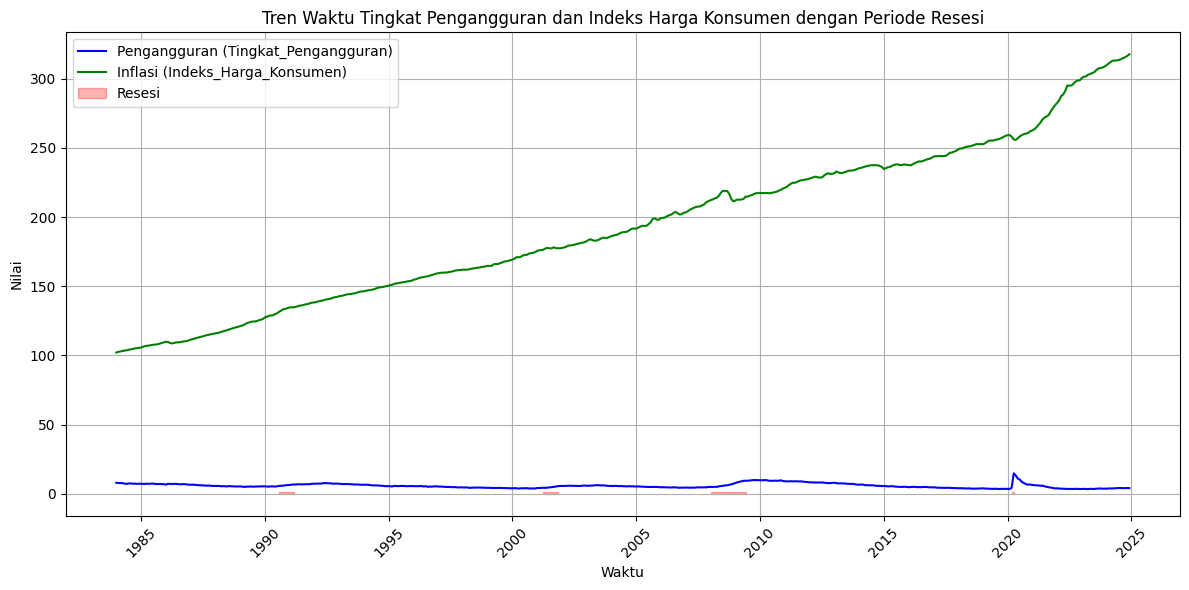

In [ ]:
print("Visualisasi Tren Waktu")
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Tingkat_Pengangguran'], label='Pengangguran (Tingkat_Pengangguran)', color='b')
plt.plot(df.index, df['Indeks_Harga_Konsumen'], label='Inflasi (Indeks_Harga_Konsumen)', color='g')

# Highlight periode resesi
plt.fill_between(df.index, 0, 1, where=(df['Target'] == 1), color='red', alpha=0.3, label='Resesi')

plt.title('Tren Waktu Tingkat Pengangguran dan Indeks Harga Konsumen dengan Periode Resesi')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Analisis Fitur terhadap Target


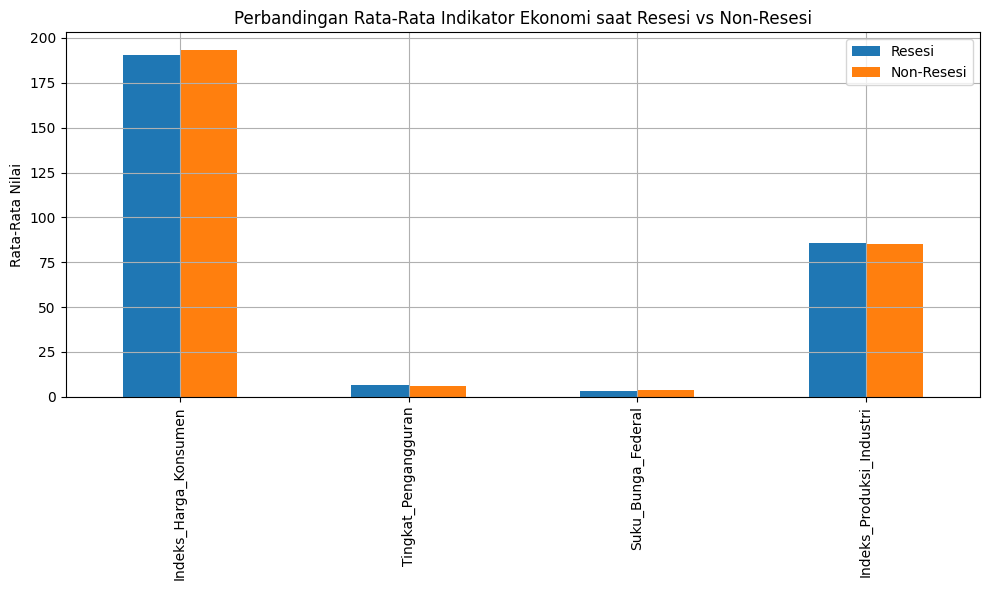

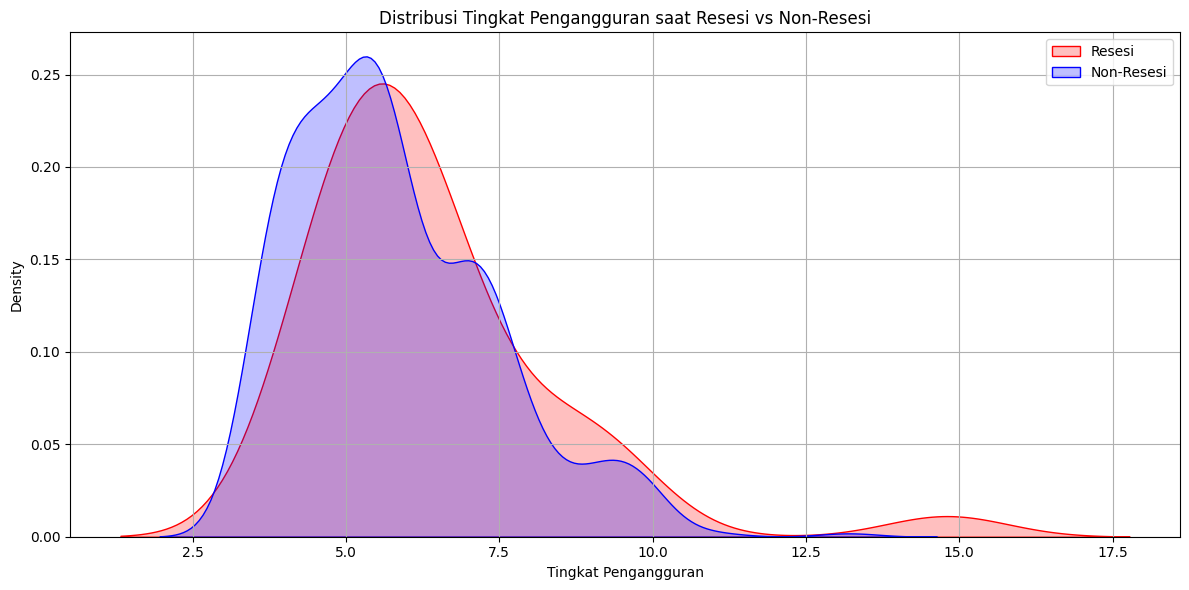

In [ ]:
print("Analisis Fitur terhadap Target")

# Data resesi dan non-resesi
resesi_df = df[df['Target'] == 1]
non_resesi_df = df[df['Target'] == 0]

# Rata-rata per fitur
fitur_terpilih = ['Indeks_Harga_Konsumen', 'Tingkat_Pengangguran', 'Suku_Bunga_Federal', 'Indeks_Produksi_Industri']
mean_resesi = resesi_df[fitur_terpilih].mean()
mean_non_resesi = non_resesi_df[fitur_terpilih].mean()

# Barplot perbandingan
mean_df = pd.DataFrame({'Resesi': mean_resesi, 'Non-Resesi': mean_non_resesi})
mean_df.plot(kind='bar', figsize=(10, 6))
plt.title('Perbandingan Rata-Rata Indikator Ekonomi saat Resesi vs Non-Resesi')
plt.ylabel('Rata-Rata Nilai')
plt.grid(True)
plt.tight_layout()
plt.show()

# KDE plot untuk distribusi Tingkat_Pengangguran
plt.figure(figsize=(12, 6))
sns.kdeplot(data=resesi_df, x='Tingkat_Pengangguran', fill=True, label='Resesi', color='red')
sns.kdeplot(data=non_resesi_df, x='Tingkat_Pengangguran', fill=True, label='Non-Resesi', color='blue')
plt.title('Distribusi Tingkat Pengangguran saat Resesi vs Non-Resesi')
plt.xlabel('Tingkat Pengangguran')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analisis Rolling Mean dan Highlight Resesi


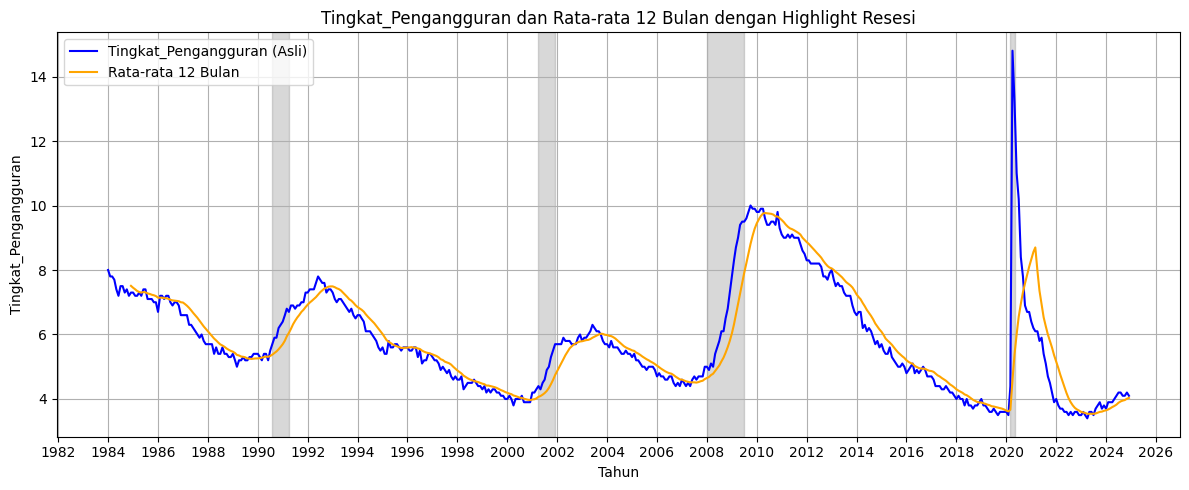

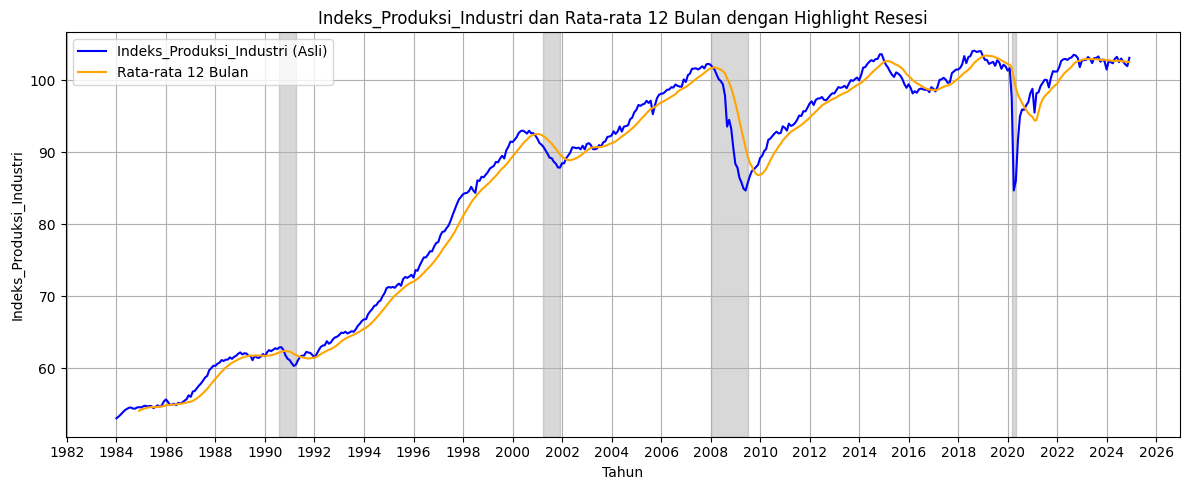

In [ ]:
print("Analisis Rolling Mean dan Highlight Resesi")

def get_recession_periods(df):
    recession_periods = []
    in_recession = False
    start = None
    for date, value in df['Target'].items():
        if value == 1 and not in_recession:
            start = date
            in_recession = True
        elif value == 0 and in_recession:
            recession_periods.append((start, date))
            in_recession = False
    if in_recession:
        recession_periods.append((start, df.index[-1]))
    return recession_periods

recession_periods = get_recession_periods(df)

indicators = ['Tingkat_Pengangguran', 'Indeks_Produksi_Industri']

for col in indicators:
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df[col], label=f'{col} (Asli)', color='blue')
    plt.plot(df.index, df[col].rolling(window=12).mean(), label='Rata-rata 12 Bulan', color='orange')

    for start, end in recession_periods:
        plt.axvspan(start, end, color='gray', alpha=0.3)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))

    plt.title(f'{col} dan Rata-rata 12 Bulan dengan Highlight Resesi')
    plt.xlabel('Tahun')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Pada Gambar di atas, area vertikal berwarna abu-abu merepresentasikan periode resesi ekonomi, sebagaimana terdeteksi berdasarkan kolom target dalam dataset. Periode ini kurang lebih bertepatan dengan masa krisis ekonomi global seperti tahun 1990–1992, 2001–2002, 2008–2010, dan 2020

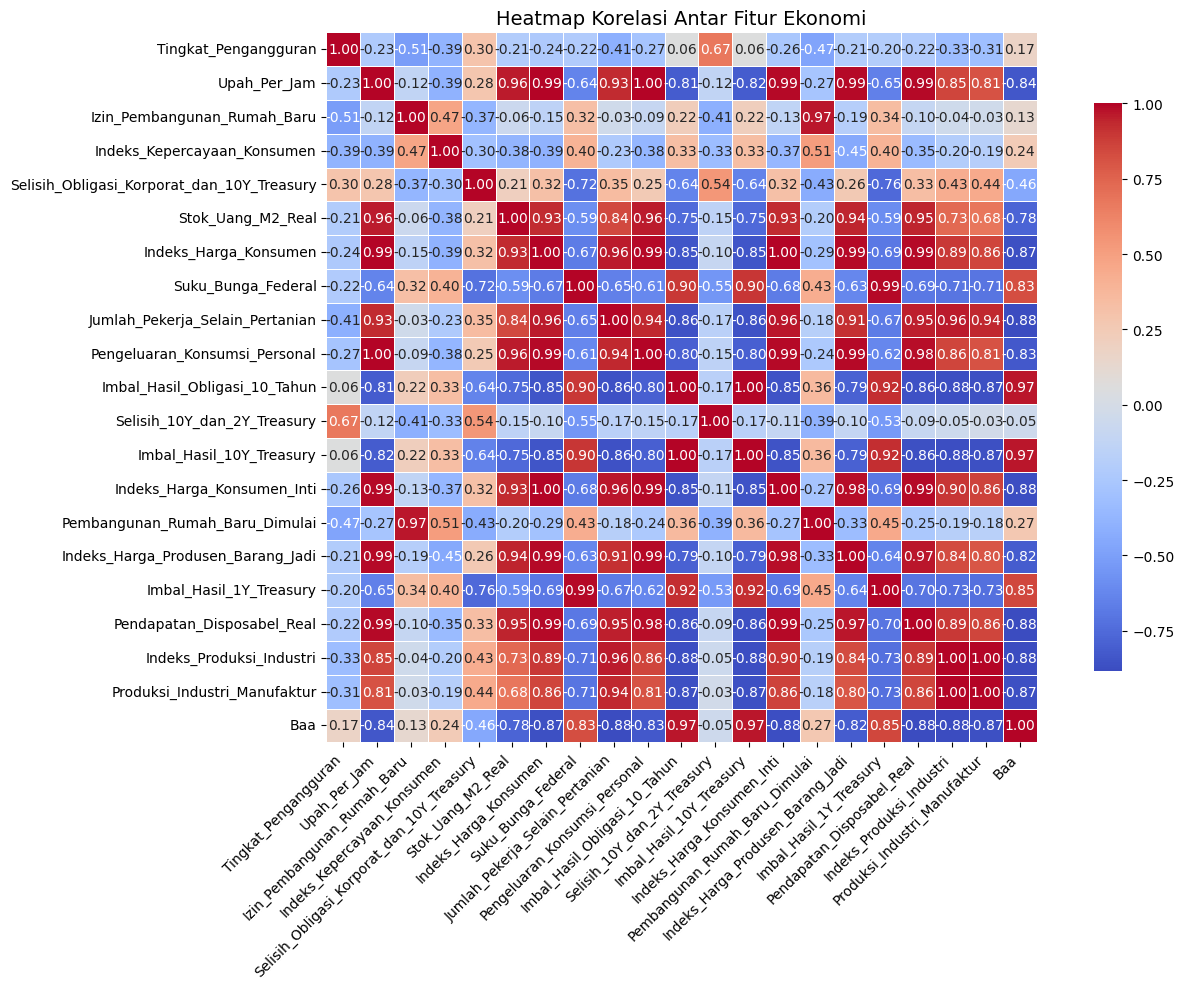

In [ ]:
# Analisis Korelasi Antar Fitur

corr_matrix = df.drop(columns=['Target']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
plt.title('Heatmap Korelasi Antar Fitur Ekonomi', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Distribusi Target Resesi:
Target
0.0    456
1.0     36
Name: count, dtype: int64


<ipython-input-20-1858413745>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette=['green', 'red'])


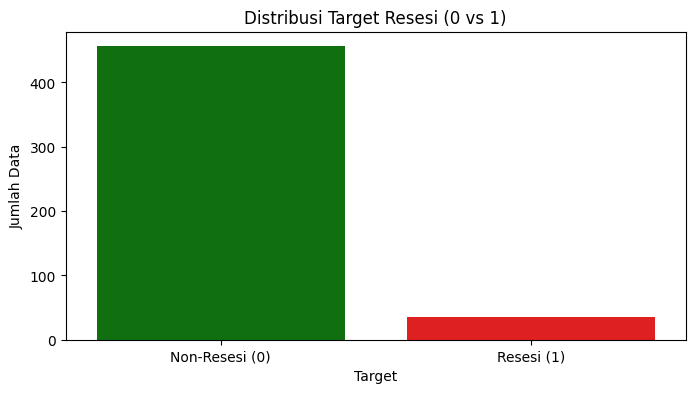

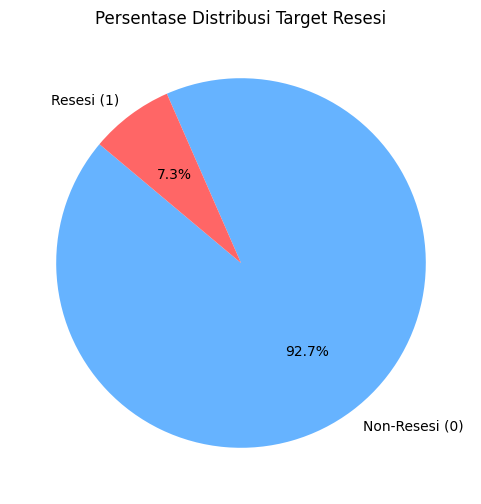

In [ ]:
target_counts = df['Target'].value_counts()

print("Distribusi Target Resesi:")
print(target_counts)

plt.figure(figsize=(8, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette=['green', 'red'])
plt.xticks([0,1], ['Non-Resesi (0)', 'Resesi (1)'])
plt.title('Distribusi Target Resesi (0 vs 1)')
plt.ylabel('Jumlah Data')
plt.show()

plt.figure(figsize=(6, 6))
colors = ['#66b3ff','#ff6666']
plt.pie(target_counts.values, labels=['Non-Resesi (0)', 'Resesi (1)'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Persentase Distribusi Target Resesi')
plt.show()

### **Penangangan Outlier**

---



In [ ]:
import pandas as pd

def detect_outliers_iqr(df):
    outlier_summary = {}

    # Only work with numeric columns
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = {
            'num_outliers': outliers.shape[0],
            'percent_outliers': (outliers.shape[0] / df.shape[0]) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return pd.DataFrame(outlier_summary).T.sort_values(by='num_outliers', ascending=False)


In [ ]:
outliers_report = detect_outliers_iqr(df)
print(outliers_report)


                                            num_outliers  percent_outliers  \
Target                                              36.0          7.317073   
Baa                                                 12.0          2.439024   
Imbal_Hasil_Obligasi_10_Tahun                        5.0          1.016260   
Imbal_Hasil_10Y_Treasury                             5.0          1.016260   
Tingkat_Pengangguran                                 3.0          0.609756   
Indeks_Kepercayaan_Konsumen                          2.0          0.406504   
Stok_Uang_M2_Real                                    0.0          0.000000   
Selisih_Obligasi_Korporat_dan_10Y_Treasury           0.0          0.000000   
Izin_Pembangunan_Rumah_Baru                          0.0          0.000000   
Upah_Per_Jam                                         0.0          0.000000   
Pengeluaran_Konsumsi_Personal                        0.0          0.000000   
Jumlah_Pekerja_Selain_Pertanian                      0.0        

In [ ]:
def remove_outliers_iqr(df, columns, protect_dates=None):
    df_clean = df.copy()

    # Pastikan protect_dates dalam format datetime index
    if protect_dates is not None:
        protect_dates = pd.to_datetime(protect_dates)

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Buat mask: nilai dalam batas IQR atau tanggal dilindungi
        is_in_bounds = (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)

        if protect_dates is not None:
            is_protected = df_clean.index.isin(protect_dates)
            mask = is_in_bounds | is_protected
        else:
            mask = is_in_bounds

        df_clean = df_clean[mask]

    return df_clean

In [ ]:
cols_to_clean = ['Tingkat_Pengangguran', 'Indeks_Kepercayaan_Konsumen']
df_clean = remove_outliers_iqr(df, cols_to_clean, protect_dates=['2020-04-01'])

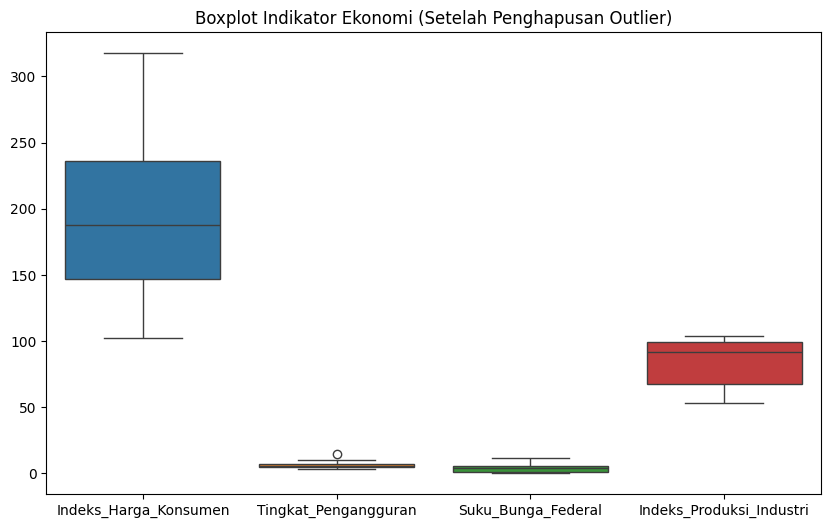

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[['Indeks_Harga_Konsumen', 'Tingkat_Pengangguran', 'Suku_Bunga_Federal', 'Indeks_Produksi_Industri']])
plt.title('Boxplot Indikator Ekonomi (Setelah Penghapusan Outlier)')
plt.show()

In [ ]:
outliers_report = detect_outliers_iqr(df_clean)
print(outliers_report)


                                            num_outliers  percent_outliers  \
Target                                              36.0          7.377049   
Baa                                                 12.0          2.459016   
Imbal_Hasil_Obligasi_10_Tahun                        5.0          1.024590   
Imbal_Hasil_10Y_Treasury                             5.0          1.024590   
Tingkat_Pengangguran                                 1.0          0.204918   
Upah_Per_Jam                                         0.0          0.000000   
Stok_Uang_M2_Real                                    0.0          0.000000   
Selisih_Obligasi_Korporat_dan_10Y_Treasury           0.0          0.000000   
Indeks_Kepercayaan_Konsumen                          0.0          0.000000   
Izin_Pembangunan_Rumah_Baru                          0.0          0.000000   
Pengeluaran_Konsumsi_Personal                        0.0          0.000000   
Jumlah_Pekerja_Selain_Pertanian                      0.0        

In [ ]:
# Ambil index sebelum dan sesudah pembersihan
index_sebelum = df.index
index_sesudah = df_clean.index

# Cari index yang hilang
index_hilang = index_sebelum.difference(index_sesudah)

# Lihat data yang dihapus
data_hilang = df.loc[index_hilang]
print(data_hilang[['Target']])

            Target
DATE              
2020-05-01     0.0
2020-06-01     0.0
2022-06-01     0.0
2022-07-01     0.0


In [ ]:
df_clean.isna().sum()

,0
Tingkat_Pengangguran,0
Upah_Per_Jam,0
Izin_Pembangunan_Rumah_Baru,0
Indeks_Kepercayaan_Konsumen,0
Selisih_Obligasi_Korporat_dan_10Y_Treasury,0
Stok_Uang_M2_Real,0
Indeks_Harga_Konsumen,0
Suku_Bunga_Federal,0
Jumlah_Pekerja_Selain_Pertanian,0
Pengeluaran_Konsumsi_Personal,0


In [ ]:
print("Isi dari kolom 'Target' pada df_monthly:")
print(df_clean['Target'].value_counts())

print("\nJumlah jenis Target:")
print(df_clean['Target'].nunique())

Isi dari kolom 'Target' pada df_monthly:
Target
0.0    452
1.0     36
Name: count, dtype: int64

Jumlah jenis Target:
2


In [ ]:
df_clean

,Tingkat_Pengangguran,Upah_Per_Jam,Izin_Pembangunan_Rumah_Baru,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Stok_Uang_M2_Real,Indeks_Harga_Konsumen,Suku_Bunga_Federal,Jumlah_Pekerja_Selain_Pertanian,Pengeluaran_Konsumsi_Personal,...,Imbal_Hasil_10Y_Treasury,Indeks_Harga_Konsumen_Inti,Pembangunan_Rumah_Baru_Dimulai,Indeks_Harga_Produsen_Barang_Jadi,Imbal_Hasil_1Y_Treasury,Pendapatan_Disposabel_Real,Indeks_Produksi_Industri,Produksi_Industri_Manufaktur,Baa,Target
DATE,,,,,,,,,,,,,,,,,,,,,
1984-01-01,8.0,8.38,1816.0,101.3788,0.350,2094.2,102.100,9.56,92673.0,2419.4,...,11.640,102.500,1897.0,103.000,9.90,5851.3,53.0088,48.5811,13.65,0.0
1984-02-01,7.8,8.38,1987.0,101.5106,0.350,2103.5,102.600,9.59,93157.0,2403.5,...,11.640,102.800,2260.0,103.400,10.04,5884.8,53.2486,49.1102,13.59,0.0
1984-03-01,7.8,8.41,1725.0,101.5403,0.270,2113.9,102.900,9.91,93429.0,2431.6,...,12.070,103.200,1663.0,103.800,10.59,5922.6,53.5028,49.3252,13.99,0.0
1984-04-01,7.7,8.45,1776.0,101.4181,0.225,2121.7,103.300,10.29,93792.0,2457.5,...,12.445,103.700,1851.0,103.900,10.90,5962.5,53.8233,49.5755,14.31,0.0
1984-05-01,7.4,8.45,1741.0,101.3399,0.180,2129.6,103.500,10.32,94098.0,2474.5,...,12.820,104.100,1774.0,103.800,11.66,5971.0,54.1104,49.7244,14.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,4.2,30.27,1470.0,100.5603,0.990,6744.2,314.131,5.33,158074.0,19905.0,...,3.990,319.839,1379.0,257.656,4.43,17494.6,103.0196,99.9270,5.60,0.0
2024-09-01,4.1,30.38,1425.0,100.5603,0.965,6756.3,314.851,5.13,158314.0,20044.1,...,3.865,320.835,1355.0,257.525,4.03,17519.6,102.5954,99.6108,5.42,0.0
2024-10-01,4.1,30.49,1419.0,100.5603,0.940,6761.1,315.564,4.83,158358.0,20123.2,...,3.740,321.688,1344.0,257.362,4.20,17568.5,102.2138,98.9959,5.63,0.0


### **Resampling Data**
per bulan dengan agregasi rata-rata (tanpa target)

---



In [ ]:
# # Ambil hanya target
# target = df_clean['Target']

# # Ambil hanya fitur
# features = df_clean.drop(columns=['Target'])

# # Resample bulanan
# features_monthly = features.resample('ME').mean()
# target_monthly = target.resample('ME').max()  # tetap biner: 0/1

# # Gabungkan
# df_monthly = features_monthly.copy()
# df_monthly['Target'] = target_monthly

# df_monthly


karena dilakukan agregate per bulan, ada bulan yang tidak ada datanya sehingga bakal jadi Nan

In [ ]:
# # Pisahkan target
# target_binary = df_monthly['Target']
# features = df_monthly.drop(columns=['Target'])

# # Interpolasi hanya fitur
# features_interpolated = features.interpolate(method='linear')

# # Gabungkan kembali
# df_monthly = features_interpolated.copy()
# df_monthly['Target'] = target_binary


In [ ]:
# print("Isi dari kolom 'Target' pada df_monthly:")
# print(df_monthly['Target'].value_counts())

# print("\nJumlah jenis Target:")
# print(df_monthly['Target'].nunique())

# Feature Selection

In [ ]:
df_monthly = df_clean.copy()

In [ ]:
df_monthly

,Tingkat_Pengangguran,Upah_Per_Jam,Izin_Pembangunan_Rumah_Baru,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Stok_Uang_M2_Real,Indeks_Harga_Konsumen,Suku_Bunga_Federal,Jumlah_Pekerja_Selain_Pertanian,Pengeluaran_Konsumsi_Personal,...,Imbal_Hasil_10Y_Treasury,Indeks_Harga_Konsumen_Inti,Pembangunan_Rumah_Baru_Dimulai,Indeks_Harga_Produsen_Barang_Jadi,Imbal_Hasil_1Y_Treasury,Pendapatan_Disposabel_Real,Indeks_Produksi_Industri,Produksi_Industri_Manufaktur,Baa,Target
DATE,,,,,,,,,,,,,,,,,,,,,
1984-01-01,8.0,8.38,1816.0,101.3788,0.350,2094.2,102.100,9.56,92673.0,2419.4,...,11.640,102.500,1897.0,103.000,9.90,5851.3,53.0088,48.5811,13.65,0.0
1984-02-01,7.8,8.38,1987.0,101.5106,0.350,2103.5,102.600,9.59,93157.0,2403.5,...,11.640,102.800,2260.0,103.400,10.04,5884.8,53.2486,49.1102,13.59,0.0
1984-03-01,7.8,8.41,1725.0,101.5403,0.270,2113.9,102.900,9.91,93429.0,2431.6,...,12.070,103.200,1663.0,103.800,10.59,5922.6,53.5028,49.3252,13.99,0.0
1984-04-01,7.7,8.45,1776.0,101.4181,0.225,2121.7,103.300,10.29,93792.0,2457.5,...,12.445,103.700,1851.0,103.900,10.90,5962.5,53.8233,49.5755,14.31,0.0
1984-05-01,7.4,8.45,1741.0,101.3399,0.180,2129.6,103.500,10.32,94098.0,2474.5,...,12.820,104.100,1774.0,103.800,11.66,5971.0,54.1104,49.7244,14.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,4.2,30.27,1470.0,100.5603,0.990,6744.2,314.131,5.33,158074.0,19905.0,...,3.990,319.839,1379.0,257.656,4.43,17494.6,103.0196,99.9270,5.60,0.0
2024-09-01,4.1,30.38,1425.0,100.5603,0.965,6756.3,314.851,5.13,158314.0,20044.1,...,3.865,320.835,1355.0,257.525,4.03,17519.6,102.5954,99.6108,5.42,0.0
2024-10-01,4.1,30.49,1419.0,100.5603,0.940,6761.1,315.564,4.83,158358.0,20123.2,...,3.740,321.688,1344.0,257.362,4.20,17568.5,102.2138,98.9959,5.63,0.0


Korelasi Fitur terhadap Target (Resesi):
Indeks_Kepercayaan_Konsumen                  -0.357390
Selisih_Obligasi_Korporat_dan_10Y_Treasury    0.322618
Izin_Pembangunan_Rumah_Baru                  -0.269249
Pembangunan_Rumah_Baru_Dimulai               -0.255319
Selisih_10Y_dan_2Y_Treasury                   0.124554
Tingkat_Pengangguran                          0.101058
Baa                                           0.098161
Imbal_Hasil_1Y_Treasury                      -0.073153
Stok_Uang_M2_Real                            -0.065912
Suku_Bunga_Federal                           -0.051058
Pengeluaran_Konsumsi_Personal                -0.036213
Imbal_Hasil_10Y_Treasury                     -0.033143
Imbal_Hasil_Obligasi_10_Tahun                -0.031279
Upah_Per_Jam                                 -0.023382
Indeks_Harga_Produsen_Barang_Jadi            -0.022190
Produksi_Industri_Manufaktur                  0.018555
Indeks_Harga_Konsumen_Inti                   -0.015180
Jumlah_Pekerja_Selain_Pe

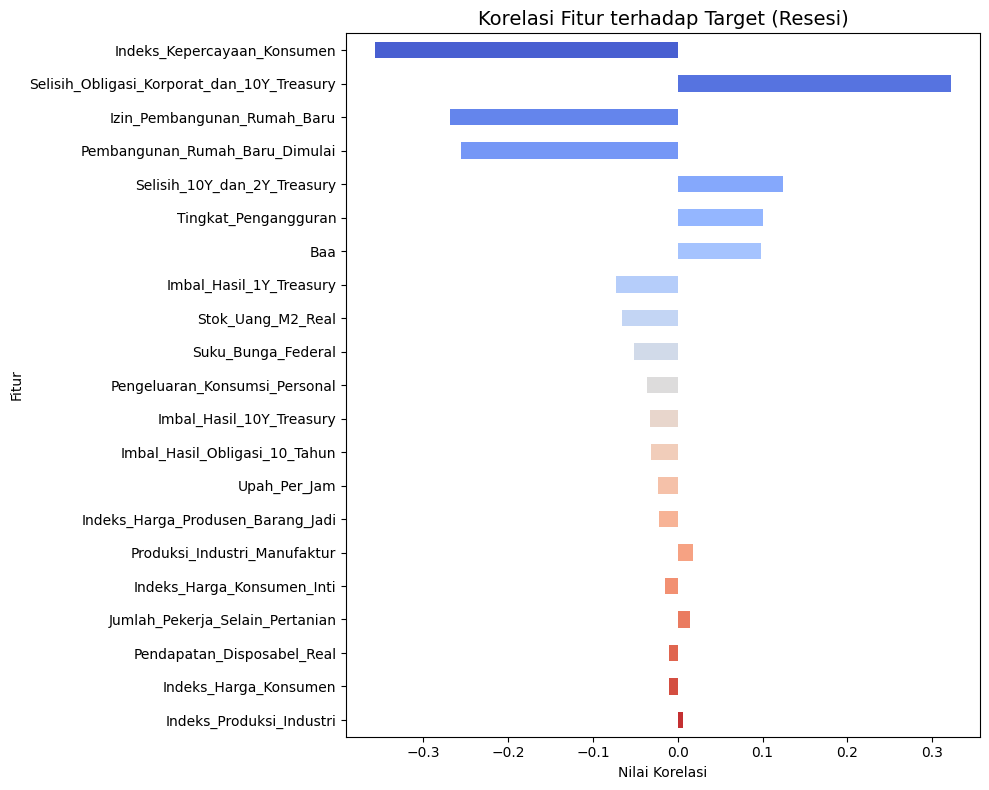

In [ ]:
df = df_monthly.copy()

correlation_matrix = df.corr()

# Ambil korelasi terhadap target
corr_with_target = correlation_matrix['Target'].drop('Target').sort_values(key=lambda x: abs(x), ascending=False)

print("Korelasi Fitur terhadap Target (Resesi):")
print(corr_with_target)

plt.figure(figsize=(10, 8))
corr_with_target.plot(kind='barh', color=sns.color_palette("coolwarm", len(corr_with_target)))
plt.title('Korelasi Fitur terhadap Target (Resesi)', fontsize=14)
plt.xlabel('Nilai Korelasi')
plt.ylabel('Fitur')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# Matriks korelasi absolut untuk menghindari masalah multikolinearitas
correlation_matrix_abs = correlation_matrix.abs()

# Hapus korelasi diri sendiri
np.fill_diagonal(correlation_matrix_abs.values, 0)

# Identifikasi pasangan fitur dengan korelasi lebih dari threshold
high_corr_pairs = correlation_matrix_abs.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.8]

print(f"\nPasangan Fitur dengan Korelasi Absolut > 0.8:")
print(high_corr_pairs)


Pasangan Fitur dengan Korelasi Absolut > 0.8:
Indeks_Harga_Konsumen          Indeks_Harga_Konsumen_Inti       0.998441
Indeks_Harga_Konsumen_Inti     Indeks_Harga_Konsumen            0.998441
Upah_Per_Jam                   Pengeluaran_Konsumsi_Personal    0.998226
Pengeluaran_Konsumsi_Personal  Upah_Per_Jam                     0.998226
Imbal_Hasil_10Y_Treasury       Imbal_Hasil_Obligasi_10_Tahun    0.997900
                                                                  ...   
Pengeluaran_Konsumsi_Personal  Produksi_Industri_Manufaktur     0.815553
Imbal_Hasil_10Y_Treasury       Upah_Per_Jam                     0.814862
Upah_Per_Jam                   Imbal_Hasil_10Y_Treasury         0.814862
                               Imbal_Hasil_Obligasi_10_Tahun    0.813524
Imbal_Hasil_Obligasi_10_Tahun  Upah_Per_Jam                     0.813524
Length: 152, dtype: float64


In [ ]:
df = correlation_matrix['Target'].drop('Target').sort_values(key=lambda x: abs(x), ascending=False)

top_n = 10
df = corr_with_target.head(top_n)

print(f"\n{top_n} Fitur dengan Korelasi Teratas terhadap Target (Resesi):")
print(df)


10 Fitur dengan Korelasi Teratas terhadap Target (Resesi):
Indeks_Kepercayaan_Konsumen                  -0.357390
Selisih_Obligasi_Korporat_dan_10Y_Treasury    0.322618
Izin_Pembangunan_Rumah_Baru                  -0.269249
Pembangunan_Rumah_Baru_Dimulai               -0.255319
Selisih_10Y_dan_2Y_Treasury                   0.124554
Tingkat_Pengangguran                          0.101058
Baa                                           0.098161
Imbal_Hasil_1Y_Treasury                      -0.073153
Stok_Uang_M2_Real                            -0.065912
Suku_Bunga_Federal                           -0.051058
Name: Target, dtype: float64


# Box-Cox Transformation

Gunakan 10 top features, kemudian ditambah log transform untuk indeks_keper_konsumen

---



In [ ]:
selected_features = [
    'Indeks_Kepercayaan_Konsumen', 'Selisih_Obligasi_Korporat_dan_10Y_Treasury',
    'Izin_Pembangunan_Rumah_Baru', 'Pembangunan_Rumah_Baru_Dimulai',
    'Selisih_10Y_dan_2Y_Treasury', 'Tingkat_Pengangguran', 'Baa', 'Imbal_Hasil_1Y_Treasury',
    'Stok_Uang_M2_Real', 'Suku_Bunga_Federal'
]

df_monthly_transformed = df_monthly.copy()
epsilon = 1e-6


df_monthly_transformed = df_monthly.copy()
epsilon = 1e-6
lambda_dict = {}
shift_dict = {}

for col in selected_features:
    print(f"Processing column: {col}")
    series = df_monthly_transformed[col].dropna()
    min_val = series.min()
    shift = abs(min_val) + epsilon if min_val <= 0 else epsilon
    shift_dict[col] = shift
    series_shifted = series + shift

    try:
        if col == 'Indeks_Kepercayaan_Konsumen':
            transformed = np.log(series_shifted)
            lambda_dict[col] = 'log'
            df_monthly_transformed.loc[series.index, col] = transformed
            print(f"[INFO] Log-transform applied to '{col}'") #indeks hasilnya terlalu besar pangkatnya
        else:
            transformed, lam = boxcox(series_shifted)
            lambda_dict[col] = lam
            df_monthly_transformed.loc[series.index, col] = transformed
    except Exception as e:
        print(f"[ERROR] Box-Cox failed for {col}: {e}")
        continue

print(df_monthly_transformed[selected_features].describe())


Processing column: Indeks_Kepercayaan_Konsumen
[INFO] Log-transform applied to 'Indeks_Kepercayaan_Konsumen'
Processing column: Selisih_Obligasi_Korporat_dan_10Y_Treasury
Processing column: Izin_Pembangunan_Rumah_Baru
Processing column: Pembangunan_Rumah_Baru_Dimulai
Processing column: Selisih_10Y_dan_2Y_Treasury
Processing column: Tingkat_Pengangguran
Processing column: Baa
Processing column: Imbal_Hasil_1Y_Treasury
Processing column: Stok_Uang_M2_Real
Processing column: Suku_Bunga_Federal
       Indeks_Kepercayaan_Konsumen  \
count                   488.000000   
mean                      4.606503   
std                       0.014317   
min                       4.569148   
25%                       4.597262   
50%                       4.610758   
75%                       4.615776   
max                       4.633261   

       Selisih_Obligasi_Korporat_dan_10Y_Treasury  \
count                                  488.000000   
mean                                     0.327513   
st

```
Lambda pada Box-Cox:
Lambda adalah angka yang memberi tahu kita bagaimana data diubah. Misalnya:

Jika lambda = 0, maka itu sama dengan logaritma dari data (transformasi log).
Jika lambda lebih besar dari 0, data akan diperbesar atau diperkuat.
Jika lambda lebih kecil dari 0, data akan dibalik.
```

In [ ]:
df_monthly_transformed

,Tingkat_Pengangguran,Upah_Per_Jam,Izin_Pembangunan_Rumah_Baru,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Stok_Uang_M2_Real,Indeks_Harga_Konsumen,Suku_Bunga_Federal,Jumlah_Pekerja_Selain_Pertanian,Pengeluaran_Konsumsi_Personal,...,Imbal_Hasil_10Y_Treasury,Indeks_Harga_Konsumen_Inti,Pembangunan_Rumah_Baru_Dimulai,Indeks_Harga_Produsen_Barang_Jadi,Imbal_Hasil_1Y_Treasury,Pendapatan_Disposabel_Real,Indeks_Produksi_Industri,Produksi_Industri_Manufaktur,Baa,Target
DATE,,,,,,,,,,,,,,,,,,,,,
1984-01-01,1.340785,8.38,11844.747520,4.618864,-0.635320,1.016076,102.100,3.800330,92673.0,2419.4,...,11.640,102.500,25298.893704,103.000,4.119216,5851.3,53.0088,48.5811,2.926189,0.0
1984-02-01,1.330964,8.38,13294.611404,4.620163,-0.635320,1.016079,102.600,3.808556,93157.0,2403.5,...,11.640,102.800,32250.394172,103.400,4.160553,5884.8,53.2486,49.1102,2.920691,0.0
1984-03-01,1.330964,8.41,11088.583770,4.620456,-0.740693,1.016082,102.900,3.895402,93429.0,2431.6,...,12.070,103.200,21077.831430,103.800,4.320057,5922.6,53.5028,49.3252,2.956932,0.0
1984-04-01,1.325915,8.45,11511.013414,4.619252,-0.803043,1.016083,103.300,3.996470,93792.0,2457.5,...,12.445,103.700,24452.303108,103.900,4.408027,5962.5,53.8233,49.5755,2.985249,0.0
1984-05-01,1.310174,8.45,11220.735122,4.618480,-0.868147,1.016085,103.500,4.004358,94098.0,2474.5,...,12.820,104.100,23053.359482,103.800,4.618233,5971.0,54.1104,49.7244,3.022400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,1.051698,30.27,9030.855118,4.610758,0.069307,1.016452,314.131,2.443759,158074.0,19905.0,...,3.990,319.839,16257.750449,257.656,2.154114,17494.6,103.0196,99.9270,1.855026,0.0
2024-09-01,1.039143,30.38,8677.649998,4.610758,0.044711,1.016453,314.851,2.366214,158314.0,20044.1,...,3.865,320.835,15866.749778,257.525,1.967937,17519.6,102.5954,99.6108,1.817266,0.0
2024-10-01,1.039143,30.49,8630.791986,4.610758,0.019943,1.016453,315.564,2.246577,158358.0,20123.2,...,3.740,321.688,15688.430915,257.362,2.048208,17568.5,102.2138,98.9959,1.861211,0.0


In [ ]:
df_monthly_transformed.to_csv("df_monthly_transformed.csv", index=False)

# Arima dengan Library

In [ ]:
# Pilih fitur 'Tingkat_Pengangguran'
ts_data = df_monthly_transformed['Tingkat_Pengangguran'].dropna()

train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]
print(f"Ukuran data training: {len(train_data)}")
print(f"Ukuran data testing: {len(test_data)}")

# Parameter ARIMA (p, d, q) sesuai analisis ACF/PACF atau auto_arima
p, d, q = 5, 1, 0

model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# Forecast pada data test
start_index = len(train_data)
end_index = len(ts_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index)

# Evaluasi performa dengan RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE pada data testing: {rmse:.4f}")

Ukuran data training: 390
Ukuran data testing: 98


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Tingkat_Pengangguran   No. Observations:                  390
Model:                   ARIMA(5, 1, 0)   Log Likelihood                1200.444
Date:                  Fri, 13 Jun 2025   AIC                          -2388.888
Time:                          04:31:47   BIC                          -2365.106
Sample:                      01-01-1984   HQIC                         -2379.459
                           - 06-01-2016                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1209      0.048     -2.526      0.012      -0.215      -0.027
ar.L2          0.0852      0.046      1.850      0.064      -0.005       0.175
ar.L3          0.2219      0.051    

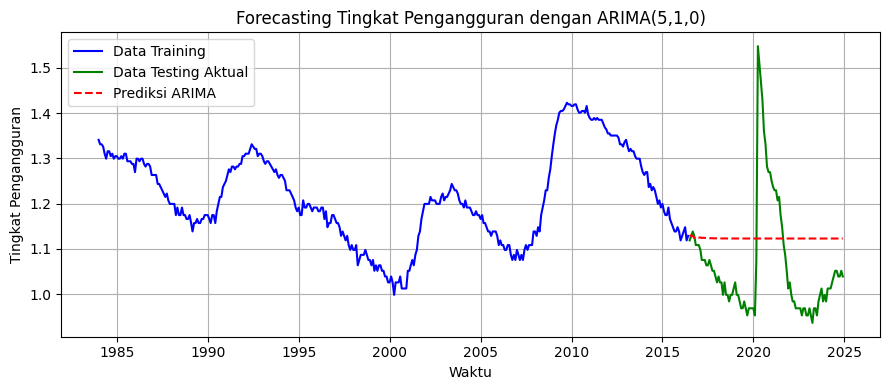

In [ ]:
# Visualisasi hasil forecasting 'Tingkat_Pengangguran'
plt.figure(figsize=(9, 4))
plt.plot(train_data.index, train_data, label='Data Training', color='blue')
plt.plot(test_data.index, test_data, label='Data Testing Aktual', color='green')
plt.plot(test_data.index, predictions, label='Prediksi ARIMA', color='red', linestyle='--')
plt.title('Forecasting Tingkat Pengangguran dengan ARIMA(5,1,0)')
plt.xlabel('Waktu')
plt.ylabel('Tingkat Pengangguran')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

# MAE
mae = mean_absolute_error(test_data, predictions)
print(f"MAE pada data testing: {mae:.4f}")

# RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE pada data testing: {rmse:.4f}")

MAE pada data testing: 0.1130
RMSE pada data testing: 0.1289


## Arima untuk Semua Fitur

In [ ]:
results = {}

for col in selected_features:
    print(f"\nFitting ARIMA on {col} ...")
    ts_data = df_monthly_transformed[col].dropna()
    train_size = int(len(ts_data)*0.8)
    train_data, test_data = ts_data[:train_size], ts_data[train_size:]

    model = ARIMA(train_data, order=(5,1,0))
    model_fit = model.fit()

    start_idx = len(train_data)
    end_idx = len(ts_data)-1
    predictions = model_fit.predict(start=start_idx, end=end_idx)

    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    print(f"RMSE on test data for {col}: {rmse:.4f}")

    results[col] = {'rmse': rmse, 'model': model_fit}
    rmse / np.mean(test_data)



Fitting ARIMA on Indeks_Kepercayaan_Konsumen ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE on test data for Indeks_Kepercayaan_Konsumen: 0.0177

Fitting ARIMA on Selisih_Obligasi_Korporat_dan_10Y_Treasury ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE on test data for Selisih_Obligasi_Korporat_dan_10Y_Treasury: 0.6064

Fitting ARIMA on Izin_Pembangunan_Rumah_Baru ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE on test data for Izin_Pembangunan_Rumah_Baru: 2502.7978

Fitting ARIMA on Pembangunan_Rumah_Baru_Dimulai ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE on test data for Pembangunan_Rumah_Baru_Dimulai: 4289.4111

Fitting ARIMA on Selisih_10Y_dan_2Y_Treasury ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE on test data for Selisih_10Y_dan_2Y_Treasury: 0.8343

Fitting ARIMA on Tingkat_Pengangguran ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE on test data for Tingkat_Pengangguran: 0.1289

Fitting ARIMA on Baa ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE on test data for Baa: 0.2285

Fitting ARIMA on Imbal_Hasil_1Y_Treasury ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

RMSE on test data for Imbal_Hasil_1Y_Treasury: 1.8540

Fitting ARIMA on Stok_Uang_M2_Real ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE on test data for Stok_Uang_M2_Real: 0.0000

Fitting ARIMA on Suku_Bunga_Federal ...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE on test data for Suku_Bunga_Federal: 1.8460


## Forecast untuk Semua Fitur


=== Forecasting 12 bulan ke depan untuk Indeks_Kepercayaan_Konsumen ===

=== Forecasting 12 bulan ke depan untuk Selisih_Obligasi_Korporat_dan_10Y_Treasury ===

=== Forecasting 12 bulan ke depan untuk Izin_Pembangunan_Rumah_Baru ===

=== Forecasting 12 bulan ke depan untuk Pembangunan_Rumah_Baru_Dimulai ===

=== Forecasting 12 bulan ke depan untuk Selisih_10Y_dan_2Y_Treasury ===

=== Forecasting 12 bulan ke depan untuk Tingkat_Pengangguran ===

=== Forecasting 12 bulan ke depan untuk Baa ===

=== Forecasting 12 bulan ke depan untuk Imbal_Hasil_1Y_Treasury ===

=== Forecasting 12 bulan ke depan untuk Stok_Uang_M2_Real ===

=== Forecasting 12 bulan ke depan untuk Suku_Bunga_Federal ===

Forecast 12 bulan ke depan:


,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Izin_Pembangunan_Rumah_Baru,Pembangunan_Rumah_Baru_Dimulai,Selisih_10Y_dan_2Y_Treasury,Tingkat_Pengangguran,Baa,Imbal_Hasil_1Y_Treasury,Stok_Uang_M2_Real,Suku_Bunga_Federal
Date,,,,,,,,,,
2025-01-01,100.606659,1.746553,1202.972323,1184.244398,0.935109,4.916923,4.472143,0.496240,5352.130295,0.392996
2025-02-01,100.460037,1.751117,1202.422873,1173.357900,0.922287,4.890024,4.474859,0.493979,5359.230525,0.396641
2025-03-01,100.387617,1.773334,1206.484965,1181.360407,0.914006,4.904306,4.465062,0.490231,5365.184601,0.400239
2025-04-01,100.384187,1.787167,1208.196983,1183.853948,0.910278,4.852042,4.458799,0.482369,5370.225520,0.401876
2025-05-01,100.415450,1.798736,1207.579801,1183.194924,0.906254,4.877227,4.456121,0.481579,5374.464076,0.403635
2025-06-01,100.452255,1.804856,1207.319642,1180.921428,0.903927,4.873463,4.453144,0.480340,5378.024559,0.406414
2025-07-01,100.479070,1.804364,1207.518646,1181.625018,0.902485,4.860368,4.452517,0.478524,5380.975282,0.408327
2025-08-01,100.491370,1.800844,1207.764333,1182.513330,0.901320,4.864360,4.452487,0.478192,5383.428586,0.409840
2025-09-01,100.491475,1.798367,1207.774025,1182.202393,0.900599,4.853568,4.452195,0.477921,5385.475455,0.410858


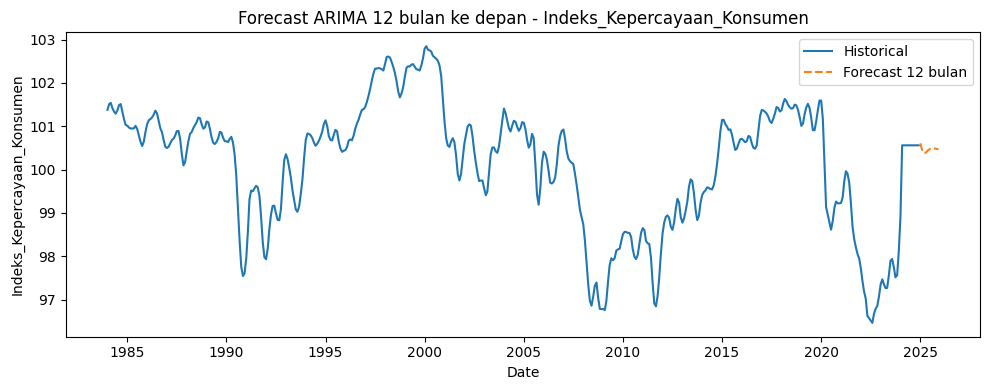

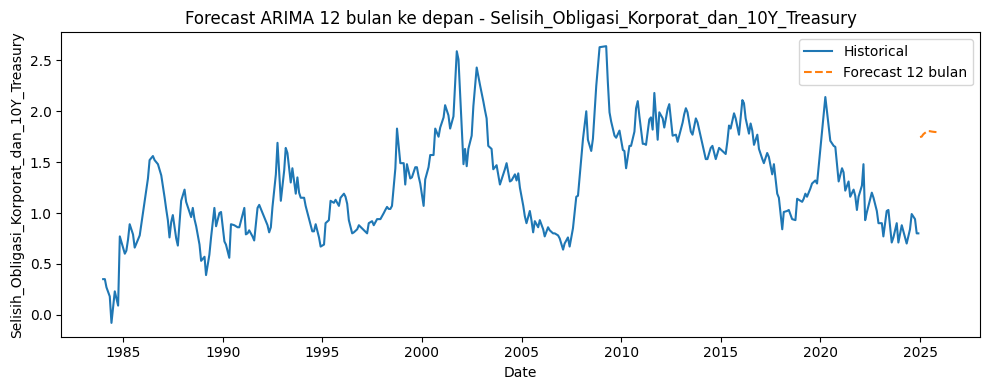

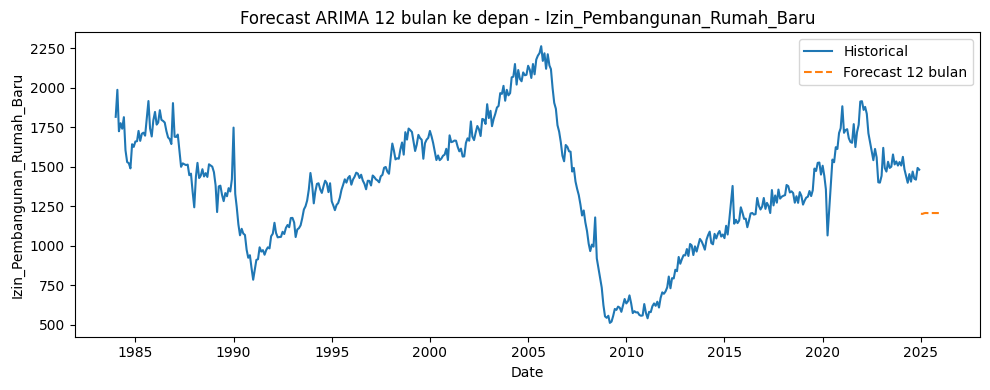

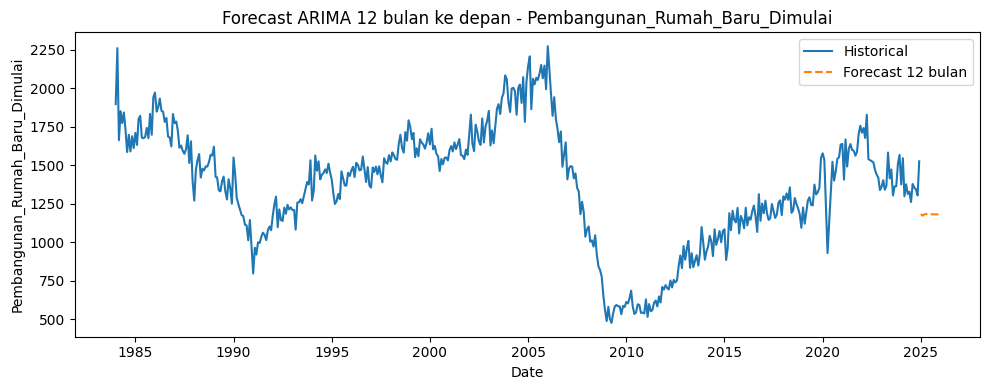

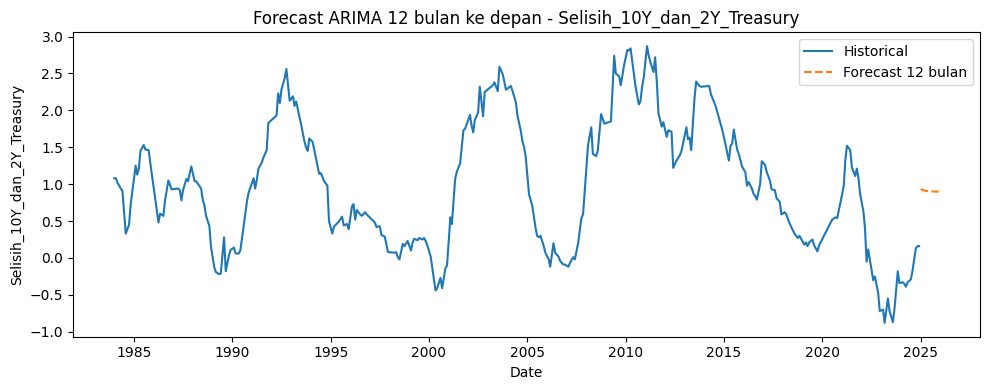

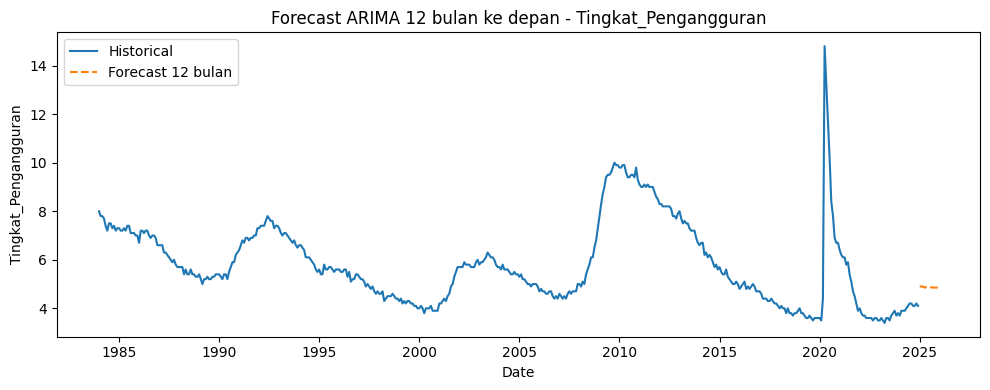

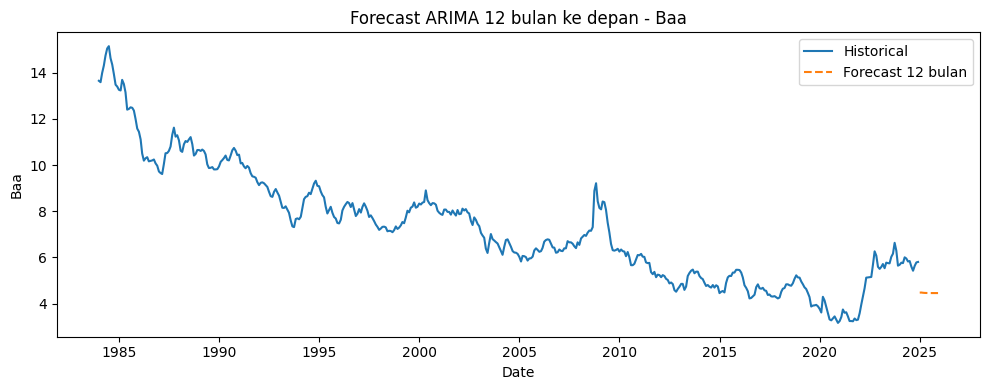

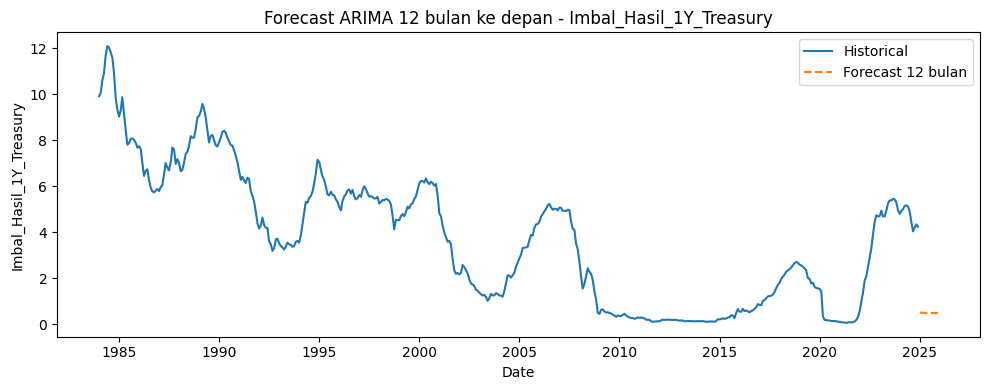

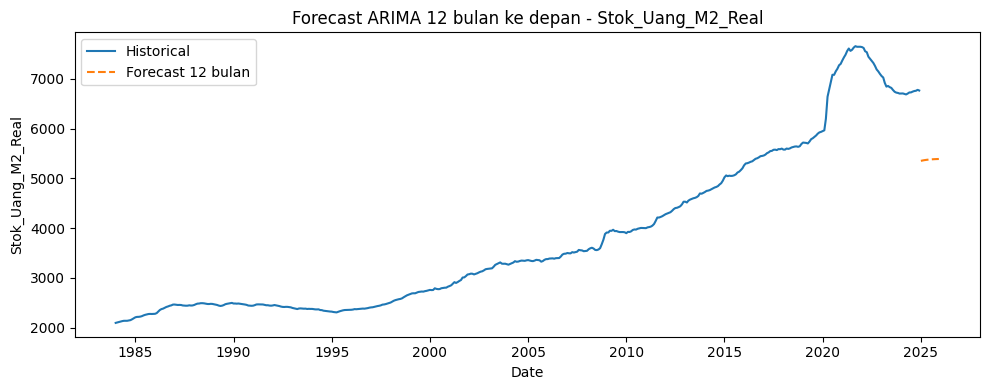

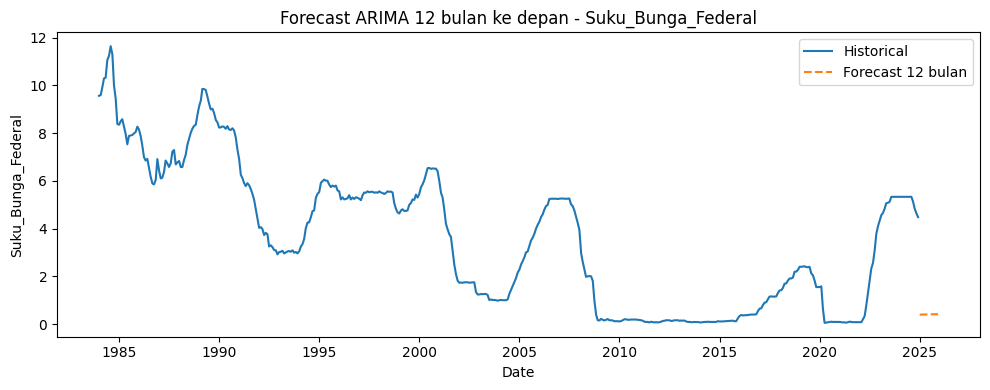

In [ ]:
forecast_dict = {}
last_date = df_monthly_transformed.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

for col in selected_features:
    print(f"\n=== Forecasting 12 bulan ke depan untuk {col} ===")

    model_fit = results[col]['model']

    # Lakukan forecast (pada data transformasi Box-Cox)
    try:
        forecast_transformed = model_fit.forecast(steps=12)
    except Exception as e:
        print(f"Error forecasting untuk {col}: {e}")
        forecast_transformed = pd.Series([np.nan] * 12, index=future_dates)

    # Ambil lambda dan shift
    lam = lambda_dict.get(col, None)
    shift = shift_dict.get(col, 0)

    # Inverse transform hasil forecast
    try:
        if lam is None:
            print(f"Warning: lambda for {col} not found, skipping inverse transform")
            forecast = forecast_transformed
        elif isinstance(lam, str) and lam.lower() == 'log':
            forecast = np.exp(forecast_transformed) - shift
        elif abs(lam) < 1e-5:
            forecast = np.exp(forecast_transformed) - shift
        else:
            inverse_val = forecast_transformed * lam + 1
            # Cegah nilai negatif sebelum power
            inverse_val[inverse_val <= 0] = np.nan
            forecast = np.power(inverse_val, 1 / lam) - shift
    except Exception as e:
        print(f"Error saat inverse transform untuk {col}: {e}")
        forecast = pd.Series([np.nan] * 12, index=future_dates)

    forecast_df = pd.DataFrame({col: forecast.values}, index=future_dates)
    forecast_dict[col] = forecast_df

# Gabungkan hasil forecast semua fitur
forecast_all = pd.concat(forecast_dict.values(), axis=1)
forecast_all.columns = selected_features
forecast_all.index.name = 'Date'

print("\nForecast 12 bulan ke depan:")
display(forecast_all)

# --- Visualisasi ---
for col in selected_features:
    plt.figure(figsize=(10, 4))

    # Ambil data asli dan inverse transform
    lam = lambda_dict.get(col, None)
    shift = shift_dict.get(col, 0)
    data_transformed = df_monthly_transformed[col].dropna()

    try:
        if lam is None:
            data_original = data_transformed
        elif isinstance(lam, str) and lam.lower() == 'log':
            data_original = np.exp(data_transformed) - shift
        elif abs(lam) < 1e-5:
            data_original = np.exp(data_transformed) - shift
        else:
            inverse_val = data_transformed * lam + 1
            inverse_val[inverse_val <= 0] = np.nan
            data_original = np.power(inverse_val, 1 / lam) - shift
    except Exception as e:
        print(f"Error inverse transform historis {col}: {e}")
        data_original = data_transformed

    # Plot data historis dan forecast
    plt.plot(data_original.index, data_original, label='Historical')
    plt.plot(forecast_all.index, forecast_all[col], linestyle='--', label='Forecast 12 bulan')
    plt.title(f'Forecast ARIMA 12 bulan ke depan - {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
forecast_all.to_csv("arima_forecast.csv")

In [ ]:
# prompt: evaluasi hasil mae dan rmse

print(f"MAE pada data testing: {mae:.4f}")

print(f"RMSE pada data testing: {rmse:.4f}")


MAE pada data testing: 0.1130
RMSE pada data testing: 1.8460


In [ ]:
# result

# Logistic Regression

In [ ]:
class LogisticRegression:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    self.losses = []

    # Gradient descent
    for i in range(self.n_iters):
      linear_model = np.dot(X, self.weights) + self.bias
      y_predicted = self.sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1/n_samples) * np.sum(y_predicted - y)

      # Update bobot
      self.weights -= self.lr * dw
      self.bias -= self.lr * db

      # Loss
      if i % 100 == 0:
        loss = - (1/n_samples) * np.sum(
            y * np.log(y_predicted + 1e-15) + (1-y) * np.log(1 - y_predicted + 1e-15)
        )
        self.losses.append(loss)
        print(f"Iteration {i}: Loss = {loss:.4f}")

  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(linear_model)
    y_predicted_class = [1 if i > 0.78 else 0 for i in y_predicted]
    return y_predicted_class

  def predict_proba(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    prob_positive = self.sigmoid(linear_model)
    return np.vstack([1 - prob_positive, prob_positive]).T #melihat probabilitas kelas 1 dan 0, transpose agar

  def sigmoid(self, x):
    return 1/ (1 + np.exp(-x))

Distribusi setelah balancing:
0.0    180
1.0    180
Name: count, dtype: int64
Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.5476
Iteration 200: Loss = 0.4947
Iteration 300: Loss = 0.4593
Iteration 400: Loss = 0.4317
Iteration 500: Loss = 0.4089
Iteration 600: Loss = 0.3897
Iteration 700: Loss = 0.3733
Iteration 800: Loss = 0.3592
Iteration 900: Loss = 0.3468

--- Logistic Regression Evaluation ---
Accuracy: 1.0
Confusion Matrix:
 [[91  0]
 [ 0  7]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        91
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



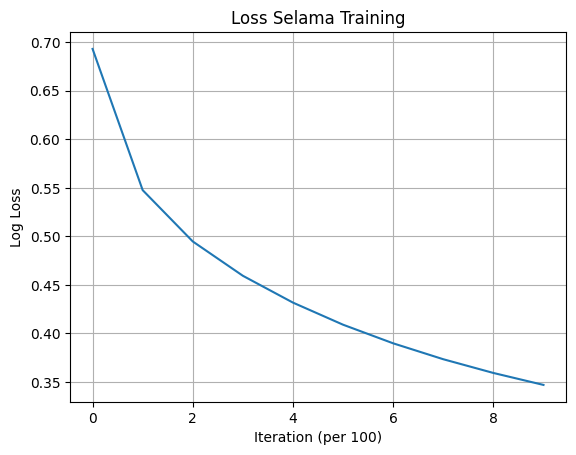

In [ ]:
# PERSIAPAN DATA
df_historical = df_monthly_transformed.copy()
df_historical = df_historical.dropna(subset=['Target'])

X = df_historical[selected_features].values
y = df_historical['Target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# BALANCING DATA DENGAN SMOTE + UNDERSAMPLING
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
pipeline = Pipeline([('o', over), ('u', under)])

X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

print("Distribusi setelah balancing:")
print(pd.Series(y_train_balanced).value_counts())

# LOGISTIC REGRESSION
logreg = LogisticRegression(lr=0.01, n_iters=1000)
logreg.fit(X_train_balanced, y_train_balanced)

y_pred_logreg = logreg.predict(X_test)

print("\n--- Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

plt.plot(logreg.losses)
plt.xlabel("Iteration (per 100)")
plt.ylabel("Log Loss")
plt.title("Loss Selama Training")
plt.grid(True)
plt.show()



In [ ]:
# Ubah array ke DataFrame
df_X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

# Tampilkan beberapa baris awal
print(df_X_scaled.head())

   Indeks_Kepercayaan_Konsumen  Selisih_Obligasi_Korporat_dan_10Y_Treasury  \
0                     0.864249                                   -2.147534   
1                     0.955089                                   -2.147534   
2                     0.975543                                   -2.382561   
3                     0.891348                                   -2.521627   
4                     0.837415                                   -2.666839   

   Izin_Pembangunan_Rumah_Baru  Pembangunan_Rumah_Baru_Dimulai  \
0                     1.140334                        1.469950   
1                     1.635526                        2.627206   
2                     0.882071                        0.767245   
3                     1.026349                        1.329013   
4                     0.927207                        1.096123   

   Selisih_10Y_dan_2Y_Treasury  Tingkat_Pengangguran       Baa  \
0                     0.179370              1.309487  2.080075   
1 

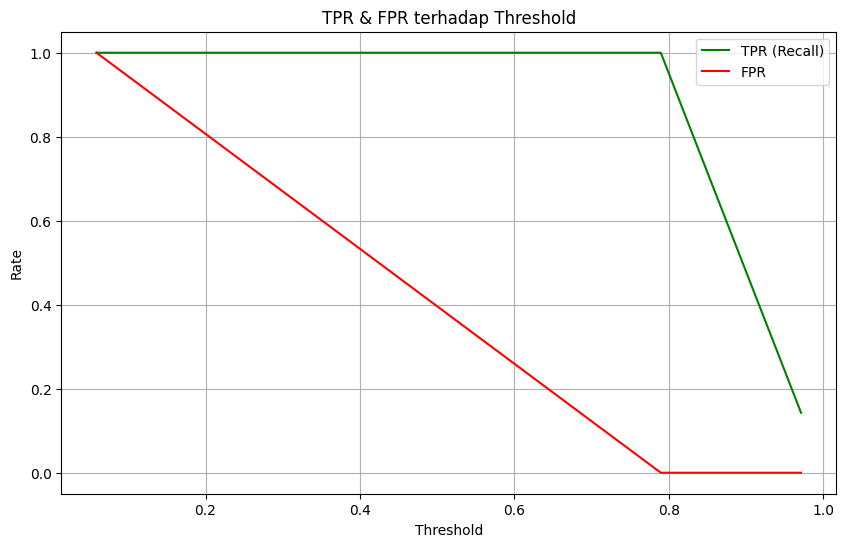

Best threshold (Youden's J): 0.7894928314382447


In [ ]:
from sklearn.metrics import roc_curve, classification_report
import matplotlib.pyplot as plt

y_proba = logreg.predict_proba(X_test)[:, 1]

# Hitung nilai ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, tpr, label="TPR (Recall)", color="green")
plt.plot(thresholds, fpr, label="FPR", color="red")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("TPR & FPR terhadap Threshold")
plt.legend()
plt.grid(True)
plt.show()

youdens_j = tpr - fpr
best_threshold = thresholds[np.argmax(youdens_j)]
print(f"Best threshold (Youden's J): {best_threshold}")

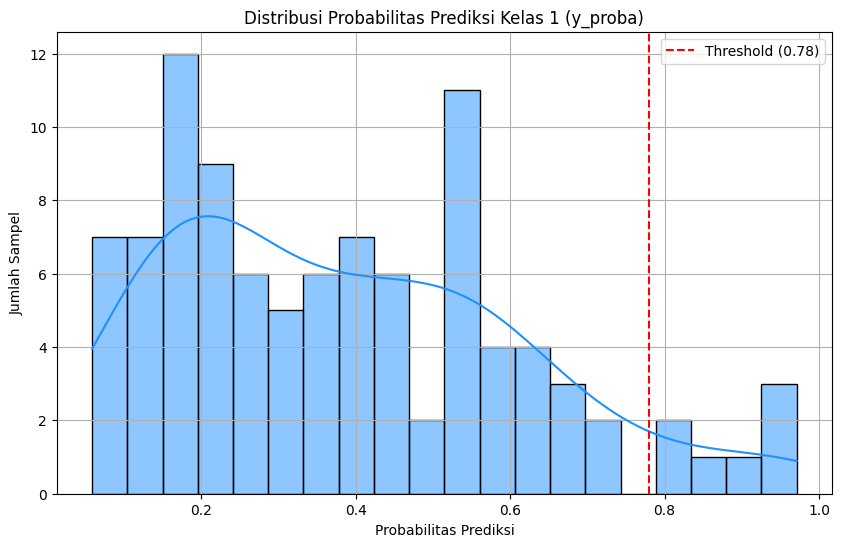

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi probabilitas prediksi kelas 1
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, bins=20, kde=True, color='dodgerblue')
plt.axvline(0.78, color='red', linestyle='--', label='Threshold (0.78)')
plt.title('Distribusi Probabilitas Prediksi Kelas 1 (y_proba)')
plt.xlabel('Probabilitas Prediksi')
plt.ylabel('Jumlah Sampel')
plt.legend()
plt.grid(True)
plt.show()


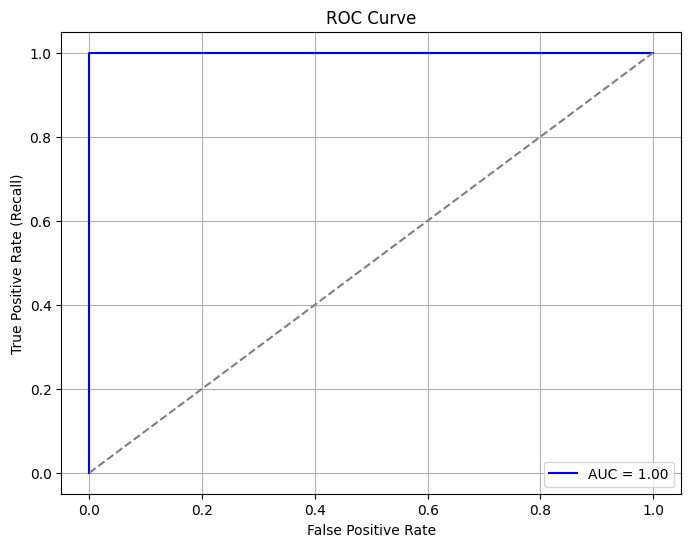

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_forecast = forecast_all[selected_features].values
X_forecast_scaled = scaler.transform(X_forecast)
forecast_predictions = logreg.predict(X_forecast_scaled)

forecast_all['prediksi_target'] = forecast_predictions

print("\nHasil Klasifikasi Regresi Logistik")
display(forecast_all)


Hasil Klasifikasi Regresi Logistik


<ipython-input-50-3300155263>:47: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-x))


,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Izin_Pembangunan_Rumah_Baru,Pembangunan_Rumah_Baru_Dimulai,Selisih_10Y_dan_2Y_Treasury,Tingkat_Pengangguran,Baa,Imbal_Hasil_1Y_Treasury,Stok_Uang_M2_Real,Suku_Bunga_Federal,prediksi_target
Date,,,,,,,,,,,
2025-01-01,100.606659,1.746553,1202.972323,1184.244398,0.935109,4.916923,4.472143,0.496240,5352.130295,0.392996,0
2025-02-01,100.460037,1.751117,1202.422873,1173.357900,0.922287,4.890024,4.474859,0.493979,5359.230525,0.396641,0
2025-03-01,100.387617,1.773334,1206.484965,1181.360407,0.914006,4.904306,4.465062,0.490231,5365.184601,0.400239,0
2025-04-01,100.384187,1.787167,1208.196983,1183.853948,0.910278,4.852042,4.458799,0.482369,5370.225520,0.401876,0
2025-05-01,100.415450,1.798736,1207.579801,1183.194924,0.906254,4.877227,4.456121,0.481579,5374.464076,0.403635,0
2025-06-01,100.452255,1.804856,1207.319642,1180.921428,0.903927,4.873463,4.453144,0.480340,5378.024559,0.406414,0
2025-07-01,100.479070,1.804364,1207.518646,1181.625018,0.902485,4.860368,4.452517,0.478524,5380.975282,0.408327,0
2025-08-01,100.491370,1.800844,1207.764333,1182.513330,0.901320,4.864360,4.452487,0.478192,5383.428586,0.409840,0
2025-09-01,100.491475,1.798367,1207.774025,1182.202393,0.900599,4.853568,4.452195,0.477921,5385.475455,0.410858,0



Hasil Klasifikasi Regresi Logistik (Prediksi Target di Masa Depan)

Prediksi Target:


<ipython-input-50-3300155263>:47: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-x))


,prediksi_target
Date,
2025-01-01,0
2025-02-01,0
2025-03-01,0
2025-04-01,0
2025-05-01,0
2025-06-01,0
2025-07-01,0
2025-08-01,0
2025-09-01,0


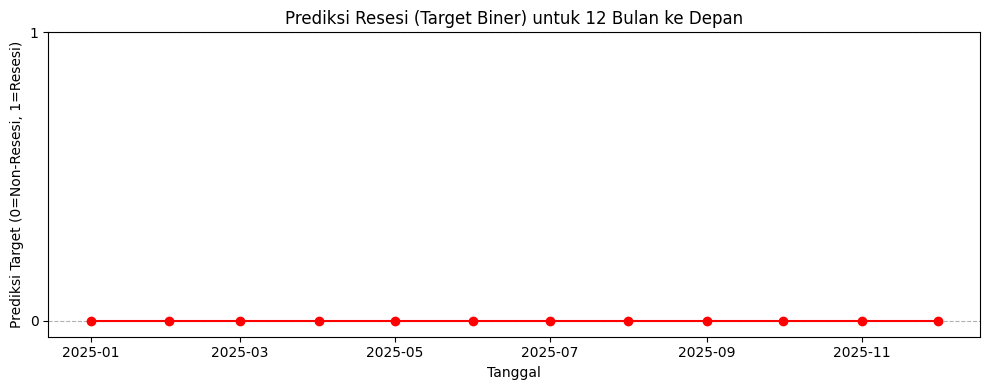

In [ ]:
X_forecast = forecast_all[selected_features].values
X_forecast_scaled = scaler.transform(X_forecast)
forecast_predictions = logreg.predict(X_forecast_scaled)

forecast_all['prediksi_target'] = forecast_predictions
print("\nHasil Klasifikasi Regresi Logistik (Prediksi Target di Masa Depan)")
print("\nPrediksi Target:")
display(forecast_all[['prediksi_target']])

plt.figure(figsize=(10, 4))
plt.plot(forecast_all.index, forecast_all['prediksi_target'], marker='o', linestyle='-', color='red')

for date, prediction in forecast_all['prediksi_target'].items():
    if prediction == 1:
        plt.axvspan(date, date + pd.DateOffset(months=1) - pd.DateOffset(days=1), color='red', alpha=0.3)

plt.title('Prediksi Resesi (Target Biner) untuk 12 Bulan ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Prediksi Target (0=Non-Resesi, 1=Resesi)')
plt.yticks([0, 1])
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
class LogisticRegression:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    self.losses = []

    # Gradient descent
    for i in range(self.n_iters):
      linear_model = np.dot(X, self.weights) + self.bias #z
      y_predicted = self.sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1/n_samples) * np.sum(y_predicted - y)

      # Update bobot
      self.weights -= self.lr * dw
      self.bias -= self.lr * db


      # Loss
      if i % 100 == 0:
        loss = - (1/n_samples) * np.sum(
            y * np.log(y_predicted + 1e-15) + (1-y) * np.log(1 - y_predicted + 1e-15)
        )
        self.losses.append(loss)
        print(f"Iteration {i}: Loss = {loss:.4f}")

  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(linear_model)
    y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_class

  def predict_proba(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    prob_positive = self.sigmoid(linear_model)
    return np.vstack([1 - prob_positive, prob_positive]).T

  def sigmoid(self, x):
    return 1/ (1 + np.exp(-x))

Distribusi setelah balancing:
0.0    180
1.0    180
Name: count, dtype: int64
Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.3356
Iteration 200: Loss = 0.2734
Iteration 300: Loss = 0.2461
Iteration 400: Loss = 0.2307
Iteration 500: Loss = 0.2206
Iteration 600: Loss = 0.2135
Iteration 700: Loss = 0.2081
Iteration 800: Loss = 0.2039
Iteration 900: Loss = 0.2005

--- Logistic Regression Evaluation ---
Accuracy: 0.9387755102040817
Confusion Matrix:
 [[85  6]
 [ 0  7]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        91
         1.0       0.54      1.00      0.70         7

    accuracy                           0.94        98
   macro avg       0.77      0.97      0.83        98
weighted avg       0.97      0.94      0.95        98



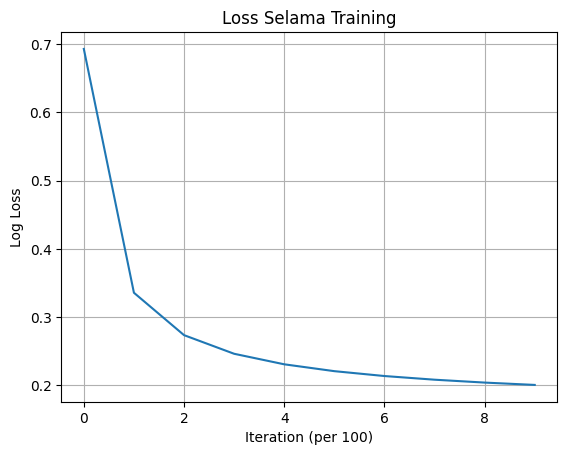

Model Logistic Regression telah disimpan ke 'logreg_model.pkl'


['logres_scaler1.pkl']

In [ ]:
# PERSIAPAN DATA
df_historical1 = df_monthly_transformed.copy()
df_historical1 = df_historical.dropna(subset=['Target'])

X1 = df_historical1[selected_features].values
y1 = df_historical1['Target'].values

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled1, y1, test_size=0.2, random_state=42, stratify=y
)

# BALANCING DATA DENGAN SMOTE + UNDERSAMPLING
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
pipeline = Pipeline([('o', over), ('u', under)])

X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

print("Distribusi setelah balancing:")
print(pd.Series(y_train_balanced).value_counts())

# LOGISTIC REGRESSION
logreg = LogisticRegression(lr=0.1, n_iters=1000)
logreg.fit(X_train_balanced, y_train_balanced)

y_pred_logreg = logreg.predict(X_test)

print("\n--- Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

plt.plot(logreg.losses)
plt.xlabel("Iteration (per 100)")
plt.ylabel("Log Loss")
plt.title("Loss Selama Training")
plt.grid(True)
plt.show()
import joblib
joblib.dump(logreg, "logreg_model1.pkl")
print("Model Logistic Regression telah disimpan ke 'logreg_model.pkl'")

joblib.dump(scaler, "logres_scaler1.pkl")


In [ ]:
X_forecast = forecast_all[selected_features].values
X_forecast_scaled = scaler.transform(X_forecast)
forecast_predictions = logreg.predict(X_forecast_scaled)

forecast_all['prediksi_target'] = forecast_predictions

print("\nHasil Klasifikasi Regresi Logistik")
display(forecast_all)


Hasil Klasifikasi Regresi Logistik


<ipython-input-58-462716769>:48: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-x))


,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Izin_Pembangunan_Rumah_Baru,Pembangunan_Rumah_Baru_Dimulai,Selisih_10Y_dan_2Y_Treasury,Tingkat_Pengangguran,Baa,Imbal_Hasil_1Y_Treasury,Stok_Uang_M2_Real,Suku_Bunga_Federal,prediksi_target
Date,,,,,,,,,,,
2025-01-01,100.606659,1.746553,1202.972323,1184.244398,0.935109,4.916923,4.472143,0.496240,5352.130295,0.392996,0
2025-02-01,100.460037,1.751117,1202.422873,1173.357900,0.922287,4.890024,4.474859,0.493979,5359.230525,0.396641,0
2025-03-01,100.387617,1.773334,1206.484965,1181.360407,0.914006,4.904306,4.465062,0.490231,5365.184601,0.400239,0
2025-04-01,100.384187,1.787167,1208.196983,1183.853948,0.910278,4.852042,4.458799,0.482369,5370.225520,0.401876,0
2025-05-01,100.415450,1.798736,1207.579801,1183.194924,0.906254,4.877227,4.456121,0.481579,5374.464076,0.403635,0
2025-06-01,100.452255,1.804856,1207.319642,1180.921428,0.903927,4.873463,4.453144,0.480340,5378.024559,0.406414,0
2025-07-01,100.479070,1.804364,1207.518646,1181.625018,0.902485,4.860368,4.452517,0.478524,5380.975282,0.408327,0
2025-08-01,100.491370,1.800844,1207.764333,1182.513330,0.901320,4.864360,4.452487,0.478192,5383.428586,0.409840,0
2025-09-01,100.491475,1.798367,1207.774025,1182.202393,0.900599,4.853568,4.452195,0.477921,5385.475455,0.410858,0


Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.3356
Iteration 200: Loss = 0.2734
Iteration 300: Loss = 0.2461
Iteration 400: Loss = 0.2307
Iteration 500: Loss = 0.2206
Iteration 600: Loss = 0.2135
Iteration 700: Loss = 0.2081
Iteration 800: Loss = 0.2039
Iteration 900: Loss = 0.2005

--- Logistic Regression Evaluation ---
Accuracy: 0.9387755102040817
Confusion Matrix:
 [[85  6]
 [ 0  7]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        91
         1.0       0.54      1.00      0.70         7

    accuracy                           0.94        98
   macro avg       0.77      0.97      0.83        98
weighted avg       0.97      0.94      0.95        98



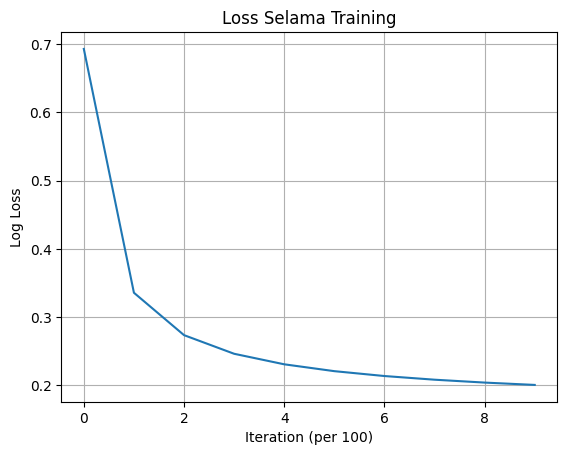

['logres_scaler.pkl']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import joblib
# from custom import LogisticRegression  # pastikan ini class buatan sendiri

# PERSIAPAN DATA
df_historical1 = df_monthly_transformed.copy()
df_historical1 = df_historical1.dropna(subset=['Target'])

X1 = df_historical1[selected_features].values
y1 = df_historical1['Target'].values

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled1, y1, test_size=0.2, random_state=42, stratify=y1
)

# BALANCING DATA
over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
pipeline = Pipeline([('o', over), ('u', under)])

X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

# TRAINING
logreg = LogisticRegression(lr=0.1, n_iters=1000)
logreg.fit(X_train_balanced, y_train_balanced)

y_pred_logreg = logreg.predict(X_test)

print("\n--- Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# VISUALISASI
plt.plot(logreg.losses)
plt.xlabel("Iteration (per 100)")
plt.ylabel("Log Loss")
plt.title("Loss Selama Training")
plt.grid(True)
plt.show()

# SIMPAN MODEL & SCALER
joblib.dump(logreg, "logreg_model.pkl")
joblib.dump(scaler, "logres_scaler.pkl")


# SVM

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# KONVERSI LABEL UNTUK SVM
y_train_svm = np.where(y_train_balanced == 0, -1, 1)
y_test_svm = np.where(y_test == 0, -1, 1)

# SVM FROM SCRATCH
# Hyperplane: w.x + b
def hyperplane(x, w, b):
    return np.dot(w, x) + b

# Jarak titik ke hyperplane
def distance_hyperplane(x, w, b):
    return np.abs(hyperplane(x, w, b)) / np.linalg.norm(w)

# Constraint SVM: y_i (w.x_i + b) >= 1
def constraint_svm(x, y, w, b):
    return y * hyperplane(x, w, b) >= 1

# Margin minimum = 1 / ||w||
def minimum_margin(w):
    return 1 / np.linalg.norm(w)

# Fungsi primal: ||w||^2
def primal_form(w):
    return np.dot(w, w)

# Lagrangian: 1/2 ||w||^2 - sum(alpha_i * (y_i * (w.x_i + b) - 1))
def lagrange(w, b, X, y, alphas):
    lagrange_sum = 0
    for i in range(len(X)):
        lagrange_sum += alphas[i] * (y[i] * hyperplane(X[i], w, b) - 1)
    return 0.5 * primal_form(w) - lagrange_sum

# KKT Constraint: sum(alpha_i * y_i) = 0
def kkt_condition(alphas, y):
    return np.isclose(np.sum(alphas * y), 0)

# Cek apakah alpha >= 0
def alpha_non_negative(alphas):
    return np.all(alphas >= 0)

# Compute w dari alpha
def compute_w(alphas, y, X):
    w = np.zeros(X.shape[1])
    for i in range(len(X)):
        w += alphas[i] * y[i] * X[i]
    return w

# Compute b dari support vectors
def compute_b(w, support_vectors, support_labels):
    b_sum = 0
    for i in range(len(support_vectors)):
        b_sum += support_labels[i] - np.dot(w, support_vectors[i])
    return b_sum / len(support_vectors)

# Decision / klasifikasi: sign(sum(alpha_i * y_i * x_i.x) + b)
def decision(x, alphas, y, X, b):
    result = 0
    for i in range(len(X)):
        result += alphas[i] * y[i] * np.dot(X[i], x)
    return np.sign(result + b)

# Fungsi dual form
def dual_form(alphas, y, X):
    first_sum = np.sum(alphas)
    second_sum = 0
    for i in range(len(X)):
        for j in range(len(X)):
            second_sum += alphas[i] * alphas[j] * y[i] * y[j] * np.dot(X[i], X[j])
    return first_sum - 0.5 * second_sum

# TRAINING SVM DENGAN DUAL FORM
def train_dual_svm_manual(X, y, C=1.0, max_iter=1000, lr=0.001):
    n_samples = X.shape[0]
    alphas = np.zeros(n_samples)
    for iter in range(1, max_iter+1):
        for i in range(n_samples):
            gradient = 1 - y[i] * np.sum(alphas * y * np.dot(X, X[i]))
            alphas[i] += lr * gradient
            if alphas[i] < 0:
                alphas[i] = 0  # alpha >= 0
            #Pastikan nilai alfa diantara 0 - C
            if alphas[i] < 0:
                alphas[i] = 0
            elif alphas[i] > C:
                alphas[i] = C

        if iter % 100 == 0 or iter == 1:
            loss = dual_form(alphas, y, X)
            print(f"Iter {iter}, Dual Objective (Loss): {loss:.4f}")
    return alphas

# LATIH DAN EVALUASI SVM
alphas = train_dual_svm_manual(X_train_balanced, y_train_svm, C=0.1, max_iter=1000, lr=0.1)

w = compute_w(alphas, y_train_svm, X_train_balanced)
support_indices = np.where(alphas > 1e-5)[0]
support_vectors = X_train_balanced[support_indices]
support_labels = y_train_svm[support_indices]
b = compute_b(w, support_vectors, support_labels)

y_pred_svm = np.array([decision(x, alphas, y_train_svm, X_train_balanced, b) for x in X_test])
y_pred_svm_bin = np.where(y_pred_svm == -1, 0, 1)
y_test_bin = np.where(y_test_svm == -1, 0, 1)

print("\n--- EVALUASI SVM MANUAL ---")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_svm_bin))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_svm_bin))
print("Classification Report:\n", classification_report(y_test_bin, y_pred_svm_bin))

print("\n--- VALIDASI DAN ANALISIS ---")
print("Alpha >= 0:", alpha_non_negative(alphas))
print("KKT Condition Terpenuhi:", kkt_condition(alphas, y_train_svm))
print("Margin Minimum:", minimum_margin(w))
print("Primal Form (||w||^2):", primal_form(w))
print("Dual Form:", dual_form(alphas, y_train_svm, X_train_balanced))
print("Lagrangian:", lagrange(w, b, X_train_balanced, y_train_svm, alphas))
import joblib

svm_model_manual = {
    "alphas": alphas,
    "w": w,
    "b": b,
    "support_vectors": support_vectors,
    "support_labels": support_labels,
    "X_train": X_train_balanced,
    "y_train": y_train_svm,
}

joblib.dump(svm_model_manual, "manual_svm_model.pkl")
print("Model SVM manual berhasil disimpan ke 'manual_svm_model.pkl'")


Iter 1, Dual Objective (Loss): 12.3706
Iter 100, Dual Objective (Loss): 16.6602
Iter 200, Dual Objective (Loss): 16.6603
Iter 300, Dual Objective (Loss): 16.6603
Iter 400, Dual Objective (Loss): 16.6603
Iter 500, Dual Objective (Loss): 16.6603
Iter 600, Dual Objective (Loss): 16.6603
Iter 700, Dual Objective (Loss): 16.6603
Iter 800, Dual Objective (Loss): 16.6603
Iter 900, Dual Objective (Loss): 16.6603
Iter 1000, Dual Objective (Loss): 16.6603

--- EVALUASI SVM MANUAL ---
Accuracy: 0.8979591836734694
Confusion Matrix:
 [[81 10]
 [ 0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        91
           1       0.41      1.00      0.58         7

    accuracy                           0.90        98
   macro avg       0.71      0.95      0.76        98
weighted avg       0.96      0.90      0.92        98


--- VALIDASI DAN ANALISIS ---
Alpha >= 0: True
KKT Condition Terpenuhi: False
Margin Minimum: 0.811952

In [ ]:
# Ambil fitur dan scaling
X_forecast = forecast_all[selected_features].values
X_forecast_scaled = scaler.transform(X_forecast)

# Prediksi manual pakai fungsi decision
forecast_predictions = []
for x in X_forecast_scaled:
    # Use the balanced training data and corresponding labels (-1/1)
    pred = decision(x, alphas, y_train_balanced, X_train_balanced, b)
    forecast_predictions.append(pred)

# Konversi -1/1 ke 0/1
forecast_predictions = np.where(np.array(forecast_predictions) == -1, 0, 1)

# Tambahkan ke dataframe
forecast_all['prediksi_target1'] = forecast_predictions

print("\nHasil Klasifikasi SVM (Manual)")
display(forecast_all)


Hasil Klasifikasi SVM (Manual)


,Indeks_Kepercayaan_Konsumen,Selisih_Obligasi_Korporat_dan_10Y_Treasury,Izin_Pembangunan_Rumah_Baru,Pembangunan_Rumah_Baru_Dimulai,Selisih_10Y_dan_2Y_Treasury,Tingkat_Pengangguran,Baa,Imbal_Hasil_1Y_Treasury,Stok_Uang_M2_Real,Suku_Bunga_Federal,prediksi_target,prediksi_target1
Date,,,,,,,,,,,,
2025-01-01,100.606659,1.746553,1202.972323,1184.244398,0.935109,4.916923,4.472143,0.496240,5352.130295,0.392996,0,0
2025-02-01,100.460037,1.751117,1202.422873,1173.357900,0.922287,4.890024,4.474859,0.493979,5359.230525,0.396641,0,0
2025-03-01,100.387617,1.773334,1206.484965,1181.360407,0.914006,4.904306,4.465062,0.490231,5365.184601,0.400239,0,0
2025-04-01,100.384187,1.787167,1208.196983,1183.853948,0.910278,4.852042,4.458799,0.482369,5370.225520,0.401876,0,0
2025-05-01,100.415450,1.798736,1207.579801,1183.194924,0.906254,4.877227,4.456121,0.481579,5374.464076,0.403635,0,0
2025-06-01,100.452255,1.804856,1207.319642,1180.921428,0.903927,4.873463,4.453144,0.480340,5378.024559,0.406414,0,0
2025-07-01,100.479070,1.804364,1207.518646,1181.625018,0.902485,4.860368,4.452517,0.478524,5380.975282,0.408327,0,0
2025-08-01,100.491370,1.800844,1207.764333,1182.513330,0.901320,4.864360,4.452487,0.478192,5383.428586,0.409840,0,0
2025-09-01,100.491475,1.798367,1207.774025,1182.202393,0.900599,4.853568,4.452195,0.477921,5385.475455,0.410858,0,0


In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # 1. Lakukan PCA untuk reduksi ke 2 dimensi
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_train_balanced)

# # 2. Transform w ke ruang PCA
# w_pca = pca.transform([w])[0] - pca.transform([[0]*X_train_balanced.shape[1]])[0]
# w_pca_unit = w_pca / np.linalg.norm(w_pca)

# # 3. Ambil support vector di ruang PCA
# support_vectors_pca = pca.transform(support_vectors)

# # 4. Buat grid untuk visualisasi margin
# x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
# y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
#                      np.linspace(y_min, y_max, 500))

# # 5. Proyeksikan grid balik ke ruang asli → prediksi kelas
# grid_points = np.c_[xx.ravel(), yy.ravel()]
# grid_original = pca.inverse_transform(grid_points)

# # Prediksi manual
# Z = [decision(x, alphas, y_train_svm, X_train_balanced, b) for x in grid_original]
# Z = np.array(Z).reshape(xx.shape)

# # 6. Plot
# plt.figure(figsize=(10, 6))
# plt.contourf(xx, yy, Z, levels=[-float('inf'), 0, float('inf')], colors=['#FFAAAA', '#AAAAFF'], alpha=0.5)

# # Plot titik data
# colors = ['red' if y == -1 else 'blue' for y in y_train_svm]
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, edgecolors='k', label='Data')

# # Plot support vectors
# plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], facecolors='none', edgecolors='k', linewidths=1.5, s=100, label='Support Vectors')

# # Hyperplane secara visual tidak eksplisit karena ruang transformasi, tapi margin terlihat di kontur
# plt.title("Visualisasi Margin SVM (dalam PCA 2D)")
# plt.xlabel("Komponen Utama 1")
# plt.ylabel("Komponen Utama 2")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.preprocessing import StandardScaler

# # Buat dataset dummy 2D
# X, y = make_classification(n_samples=100, n_features=2,
#                            n_informative=2, n_redundant=0,
#                            n_clusters_per_class=1, class_sep=1.5,
#                            random_state=42)

# # Ubah label ke -1 dan 1
# y_svm = np.where(y == 0, -1, 1)

# # Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # SVM Training (manual, soft margin)
# def train_svm(X, y, C=1.0, lr=0.001, max_iter=1000):
#     n_samples = X.shape[0]
#     alphas = np.zeros(n_samples)

#     for it in range(max_iter):
#         for i in range(n_samples):
#             gradient = 1 - y[i] * np.sum(alphas * y * X.dot(X[i]))
#             alphas[i] += lr * gradient
#             alphas[i] = np.clip(alphas[i], 0, C)
#     return alphas

# def compute_w(alphas, y, X):
#     return np.sum((alphas * y)[:, np.newaxis] * X, axis=0)

# def compute_b(w, support_vectors, support_labels):
#     return np.mean(support_labels - support_vectors.dot(w))

# def decision(x, alphas, y, X, b):
#     return np.sign(np.sum(alphas * y * X.dot(x)) + b)

# # Latih model
# C = 0.1
# alphas = train_svm(X_scaled, y_svm, C=C)
# w = compute_w(alphas, y_svm, X_scaled)
# support_idx = np.where(alphas > 1e-5)[0]
# b = compute_b(w, X_scaled[support_idx], y_svm[support_idx])

# # Visualisasi
# plt.figure(figsize=(10, 6))

# # Plot data
# plt.scatter(X_scaled[y_svm == -1][:, 0], X_scaled[y_svm == -1][:, 1], c='red', label='Class -1')
# plt.scatter(X_scaled[y_svm == 1][:, 0], X_scaled[y_svm == 1][:, 1], c='blue', label='Class +1')

# # Plot support vector
# plt.scatter(X_scaled[support_idx][:, 0], X_scaled[support_idx][:, 1],
#             facecolors='none', edgecolors='k', linewidths=1.5, s=100, label='Support Vectors')

# # Buat garis keputusan dan margin
# x_vals = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 100)
# y_vals = -(w[0]*x_vals + b)/w[1]
# margin = 1 / np.linalg.norm(w)
# y_margin_up = y_vals + margin
# y_margin_down = y_vals - margin

# # Plot garis
# plt.plot(x_vals, y_vals, 'k-', label='Hyperplane')
# plt.plot(x_vals, y_margin_up, 'k--', linewidth=1)
# plt.plot(x_vals, y_margin_down, 'k--', linewidth=1)

# plt.title(f"SVM Manual (C={C}) dengan Margin Akurat")
# plt.xlabel("Fitur 1 (terstandarisasi)")
# plt.ylabel("Fitur 2 (terstandarisasi)")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()
